In [ ]:
# ! pip install kaggle

In [ ]:
# !pip install pycaret
# !pip install pmdarima

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os 
print(os.getcwd())

/content


In [ ]:
os.chdir('/content/drive/MyDrive/Kaggle')

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [ ]:
def check_null(data):
    for i in data.columns:
        print(i,":",(data[str(i)].isnull().sum()/data.shape[0])*100)

# **Data Cleaning**

In [ ]:
city_day = pd.read_csv("/content/drive/MyDrive/Kaggle/air-quality-in-india/city_day.csv")
city_hour = pd.read_csv("/content/drive/MyDrive/Kaggle/air-quality-in-india/city_hour.csv")
station_hour = pd.read_csv("/content/drive/MyDrive/Kaggle/air-quality-in-india/station_hour.csv")
station_day = pd.read_csv("/content/drive/MyDrive/Kaggle/air-quality-in-india/station_day.csv")
stations = pd.read_csv("//content/drive/MyDrive/Kaggle/air-quality-in-india/stations.csv")

In [ ]:
d_city_day = city_day[city_day['City'] == 'Delhi']
d_city_hour = city_hour[city_hour['City'] == 'Delhi'] 
d_station_day = station_day[station_day['StationId'].str[:2] == 'DL']
d_station_hour = station_hour[station_hour['StationId'].str[:2] == 'DL']
d_stations = stations[stations['State'] == 'Delhi']

In [ ]:
ch_city_day = city_day[city_day['City'] == 'Chennai']
ch_city_hour = city_hour[city_hour['City'] == 'Chennai'] 
ch_station_day = station_day[station_day['StationId'].str[:2] == 'TN']
ch_station_hour = station_hour[station_hour['StationId'].str[:2] == 'TN']
ch_stations = stations[stations['City'] == 'Chennai']

In [ ]:
datasets = [d_city_day,d_city_hour,d_station_day,d_station_hour,d_stations,ch_city_day,ch_city_hour,ch_station_day,ch_station_hour,ch_stations]
print("Delhi")
ct = 0
for i in datasets:
    if(ct%5 == 0 and ct!=0):
        print("Chennai")
        print("***********************************")
    check_null(i)
    print("***********************************")
    ct+=1

Delhi
City : 0.0
Date : 0.0
PM2.5 : 0.09955201592832255
PM10 : 3.8327526132404177
NO : 0.09955201592832255
NO2 : 0.09955201592832255
NOx : 0.0
NH3 : 0.44798407167745147
CO : 0.0
SO2 : 5.47536087605774
O3 : 4.181184668989547
Benzene : 0.0
Toluene : 0.0
Xylene : 38.87506222000995
AQI : 0.49776007964161273
AQI_Bucket : 0.49776007964161273
***********************************
City : 0.0
Datetime : 0.0
PM2.5 : 0.7781374501992032
PM10 : 5.023655378486056
NO : 0.6183598937583001
NO2 : 0.6847609561752988
NOx : 0.05187583001328021
NH3 : 2.033532536520584
CO : 0.7553120849933599
SO2 : 5.917994687915007
O3 : 4.56714807436919
Benzene : 0.07885126162018592
Toluene : 0.053950863213811415
Xylene : 39.22642762284197
AQI : 1.0333665338645417
AQI_Bucket : 1.0333665338645417
***********************************
StationId : 0.0
Date : 0.0
PM2.5 : 18.994708994708994
PM10 : 29.071869488536155
NO : 15.771604938271604
NO2 : 16.060405643738974
NOx : 12.669753086419751
NH3 : 38.99029982363316
CO : 16.214726631393

In [ ]:
d_city_day.dropna(inplace = True)
d_city_hour.dropna(inplace = True)
d_station_day.dropna(inplace = True)
d_station_hour.dropna(inplace = True)
d_stations.dropna(inplace = True)


In [ ]:
ch_city_day['PM10'].replace(np.nan,ch_city_day['PM10'].median(),inplace = True)

In [ ]:
ch_city_day.drop(columns = ['Xylene'],axis = 1,inplace = True)

In [ ]:
ch_city_day.dropna(inplace = True)

In [ ]:
ch_city_day

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
7929,Chennai,2015-04-06,83.19,50.245,9.46,16.84,15.85,12.35,3.42,5.63,23.22,0.14,5.12,193.0,Moderate
7932,Chennai,2015-04-09,66.72,50.245,12.08,16.79,15.37,12.76,5.14,4.31,22.29,8.61,7.39,208.0,Poor
7947,Chennai,2015-04-24,70.45,50.245,27.72,39.33,14.56,12.32,5.53,5.10,27.91,14.22,9.63,180.0,Moderate
7957,Chennai,2015-05-04,28.97,50.245,14.67,16.92,7.19,16.06,8.10,5.86,11.91,0.57,0.46,100.0,Satisfactory
7958,Chennai,2015-05-05,35.16,50.245,20.39,22.34,10.33,14.54,5.16,6.65,17.11,2.45,1.24,107.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9838,Chennai,2020-06-27,26.42,39.300,7.25,12.96,19.59,33.20,1.10,7.29,68.51,0.10,0.07,95.0,Satisfactory
9839,Chennai,2020-06-28,25.93,45.540,7.81,10.00,16.39,35.98,0.76,6.48,77.45,0.09,0.00,98.0,Satisfactory
9840,Chennai,2020-06-29,21.30,22.210,7.65,9.69,16.74,34.07,0.96,6.62,62.57,0.09,0.01,104.0,Moderate
9841,Chennai,2020-06-30,24.14,30.660,8.42,12.38,20.29,34.17,1.05,7.50,68.75,0.17,0.16,110.0,Moderate


In [ ]:
check_null(ch_city_hour)

City : 0.0
Datetime : 0.0
PM2.5 : 6.880810092961487
PM10 : 87.94613213811421
NO : 2.5709661354581677
NO2 : 2.606241699867198
NOx : 2.475514608233732
NH3 : 26.469123505976093
CO : 2.351012616201859
SO2 : 2.6622675962815405
O3 : 3.7537350597609564
Benzene : 18.669073705179283
Toluene : 18.380644090305445
Xylene : 100.0
AQI : 7.351842629482072
AQI_Bucket : 7.351842629482072


In [ ]:
ch_city_hour['PM10'].replace(np.nan,ch_city_hour['PM10'].median(),inplace = True)
ch_city_hour.drop(columns = ['Xylene'],axis = 1,inplace = True)
ch_city_hour.dropna(inplace = True)

In [ ]:
ch_station_day

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
91979,TN001,2015-01-01,NaN,NaN,8.81,12.54,20.63,NaN,1.60,7.61,3.86,NaN,NaN,NaN,NaN,NaN
91980,TN001,2015-01-02,NaN,NaN,8.71,12.60,20.59,NaN,1.55,7.53,3.82,NaN,NaN,NaN,NaN,NaN
91981,TN001,2015-01-03,NaN,NaN,8.90,12.80,20.82,NaN,1.48,7.69,3.90,NaN,NaN,NaN,NaN,NaN
91982,TN001,2015-01-04,NaN,NaN,8.69,12.45,20.50,NaN,1.60,7.51,3.80,NaN,NaN,NaN,NaN,NaN
91983,TN001,2015-01-05,NaN,NaN,8.74,12.59,20.61,NaN,1.38,7.56,3.83,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98766,TN005,2020-06-27,11.81,15.08,NaN,40.84,23.43,2.49,0.57,6.04,15.42,0.0,0.0,NaN,34.0,Good
98767,TN005,2020-06-28,14.04,16.03,NaN,44.77,26.75,2.63,0.57,5.88,11.45,0.0,0.0,NaN,32.0,Good
98768,TN005,2020-06-29,16.26,20.81,NaN,49.22,31.02,2.01,0.61,6.19,10.09,0.0,0.0,NaN,41.0,Good
98769,TN005,2020-06-30,14.21,15.69,NaN,39.15,20.83,1.72,0.59,5.59,13.85,0.0,0.0,NaN,33.0,Good


In [ ]:
check_null(ch_station_day)

StationId : 0.0
Date : 0.0
PM2.5 : 21.17196702002356
PM10 : 89.97349823321554
NO : 17.314487632508836
NO2 : 16.813898704358067
NOx : 16.504711425206125
NH3 : 69.1696113074205
CO : 7.361601884570082
SO2 : 18.094817432273263
O3 : 39.620141342756185
Benzene : 43.15371024734983
Toluene : 42.68256772673734
Xylene : 100.0
AQI : 24.11660777385159
AQI_Bucket : 24.11660777385159


In [ ]:
ch_station_day['PM10'].replace(np.nan,ch_station_day['PM10'].median(),inplace = True)
ch_station_day['NH3'].replace(np.nan,ch_station_day['NH3'].median(),inplace = True)
ch_station_day['O3'].replace(np.nan,ch_station_day['O3'].median(),inplace = True)
ch_station_day['Benzene'].replace(np.nan,ch_station_day['Benzene'].median(),inplace = True)
ch_station_day['Toluene'].replace(np.nan,ch_station_day['Toluene'].median(),inplace = True)
ch_station_day['AQI'].replace(np.nan,ch_station_day['AQI'].median,inplace = True)
ch_station_day.drop(columns=['Xylene'],axis = 1, inplace = True)

In [ ]:
ch_station_day.dropna(inplace = True)

In [ ]:
ch_station_hour.columns

Index(['StationId', 'Datetime', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3',
       'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [ ]:
for i in ch_station_hour.columns:
    if(i == 'AQI_Bucket' or i == 'Xylene'):
        break
    elif(i == 'StationId' or i == 'Datetime'):
        continue
    ch_station_hour[str(i)].replace(np.nan,ch_station_day[str(i)].median(),inplace = True)

In [ ]:
check_null(ch_station_hour)

StationId : 0.0
Datetime : 0.0
PM2.5 : 0.0
PM10 : 0.0
NO : 0.0
NO2 : 0.0
NOx : 0.0
NH3 : 0.0
CO : 0.0
SO2 : 0.0
O3 : 0.0
Benzene : 0.0
Toluene : 0.0
Xylene : 100.0
AQI : 26.75086107921929
AQI_Bucket : 26.75086107921929


In [ ]:
ch_station_hour.drop(columns = ['Xylene'], axis = 1, inplace = True)
ch_station_hour.dropna(inplace = True)

In [ ]:
ch_stations

,StationId,StationName,City,State,Status
179,TN001,"Alandur Bus Depot, Chennai - CPCB",Chennai,Tamil Nadu,Active
180,TN002,"Manali Village, Chennai - TNPCB",Chennai,Tamil Nadu,Active
181,TN003,"Manali, Chennai - CPCB",Chennai,Tamil Nadu,Active
182,TN004,"Velachery Res. Area, Chennai - CPCB",Chennai,Tamil Nadu,Active


In [ ]:
d_city_hour['Datetime'] = pd.to_datetime(d_city_hour['Datetime'])
d_city_day['Date'] = pd.to_datetime(d_city_day['Date'])
d_station_day['Date'] = pd.to_datetime(d_station_day['Date'])
d_station_hour['Datetime'] = pd.to_datetime(d_station_hour['Datetime'])
ch_city_day['Date'] = pd.to_datetime(ch_city_day['Date'])
ch_city_hour['Datetime'] = pd.to_datetime(ch_city_hour['Datetime'])
ch_station_day['Date'] = pd.to_datetime(ch_station_day['Date'])
ch_station_hour['Datetime'] = pd.to_datetime(ch_station_hour['Datetime'])

In [ ]:
print(d_city_hour.head())

         City            Datetime   PM2.5  ...  Xylene    AQI  AQI_Bucket
245187  Delhi 2015-01-01 16:00:00  211.51  ...    4.73  456.0      Severe
245188  Delhi 2015-01-01 17:00:00  191.12  ...    3.78  450.0      Severe
245189  Delhi 2015-01-01 18:00:00  218.44  ...    4.98  446.0      Severe
245190  Delhi 2015-01-01 19:00:00  296.80  ...    8.78  475.0      Severe
245191  Delhi 2015-01-01 20:00:00  336.43  ...    9.99  480.0      Severe

[5 rows x 16 columns]


# **Data Analysis**

In [ ]:
colors = {"Severe":'#a52a2a',"Moderate":'#ff0000',"Very Poor":'#ff9900',"Poor":'#ffff00',"Satisfactory":'#66cc00',"Good":'#00cc00'}

# **Frequency of AQI**

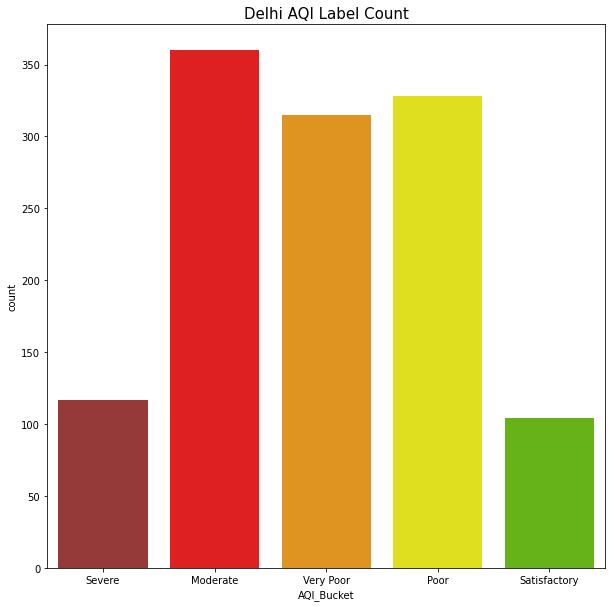

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(d_city_day['AQI_Bucket'],palette = colors)
plt.title("Delhi AQI Label Count",fontsize = 15)
plt.savefig("delhi_aqi_label.png")

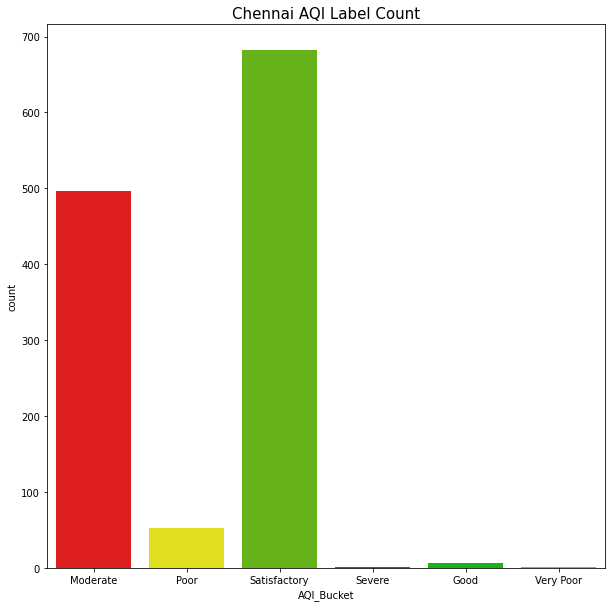

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(ch_city_day['AQI_Bucket'],palette = colors)
plt.title("Chennai AQI Label Count",fontsize = 15)
plt.savefig("ch_aqi_label.png")


# **Impact of COVID19**

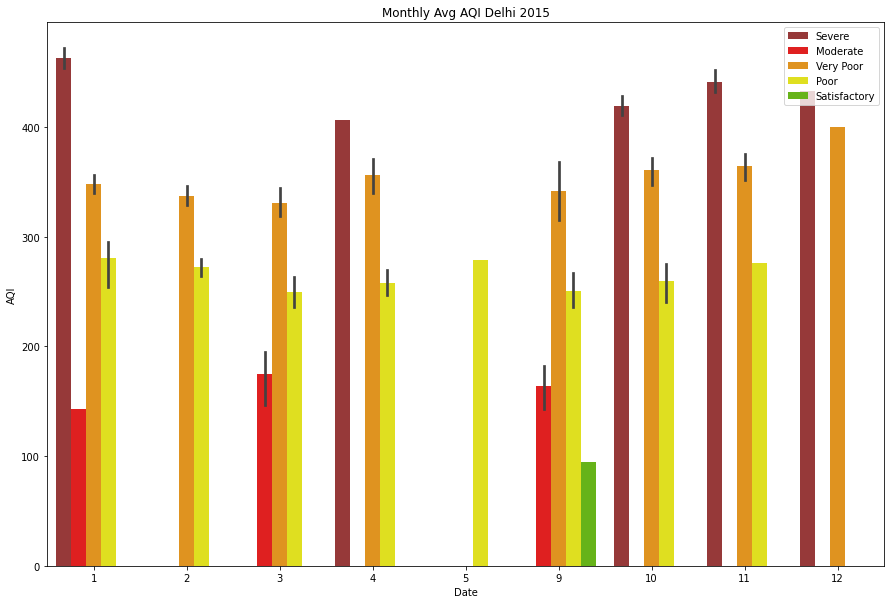

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x = d_city_day[d_city_day['Date'].dt.year == 2015]['Date'].dt.month , y = d_city_day['AQI'],hue = d_city_day['AQI_Bucket'],palette = colors)
plt.legend()
plt.title("Monthly Avg AQI Delhi 2015")
plt.savefig("d_aqi_2015")
plt.show()

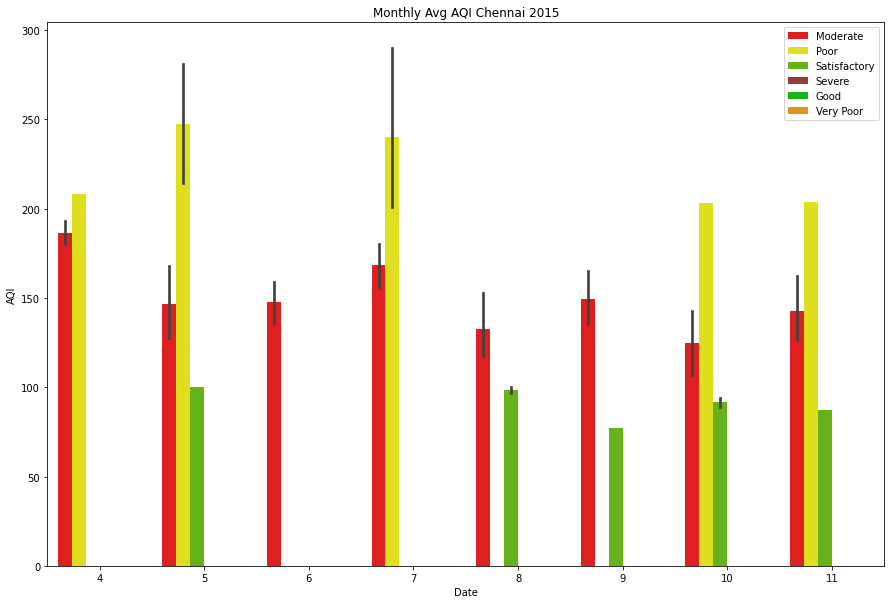

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x = ch_city_day[ch_city_day['Date'].dt.year == 2015]['Date'].dt.month , y = ch_city_day['AQI'],hue = ch_city_day['AQI_Bucket'],palette = colors)
plt.legend()
plt.title("Monthly Avg AQI Chennai 2015")
plt.savefig("ch_aqi_2015.png")
plt.show()

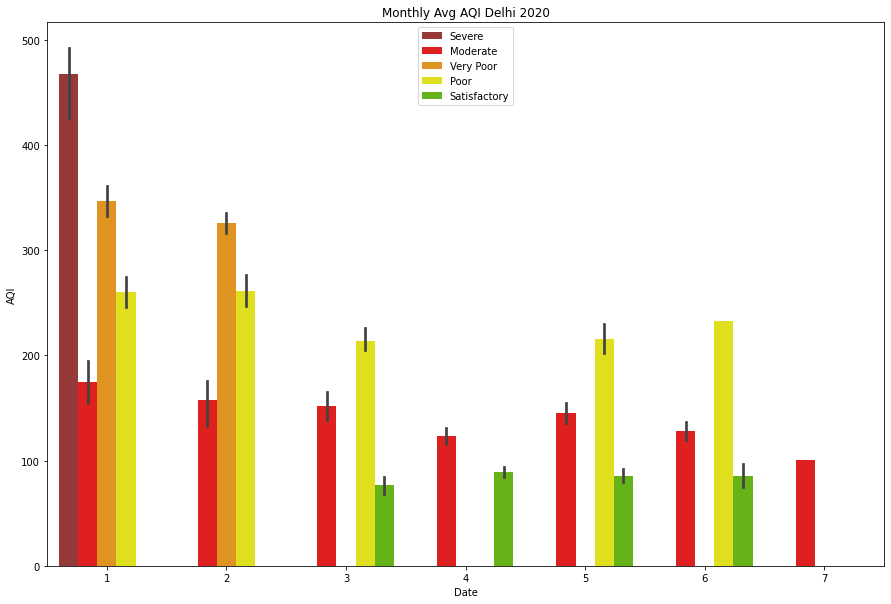

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x = d_city_day[d_city_day['Date'].dt.year == 2020]['Date'].dt.month , y = d_city_day['AQI'],hue = d_city_day['AQI_Bucket'],palette = colors)
plt.legend()
plt.title("Monthly Avg AQI Delhi 2020")
plt.savefig("d_aqi_2020.png")
plt.show()

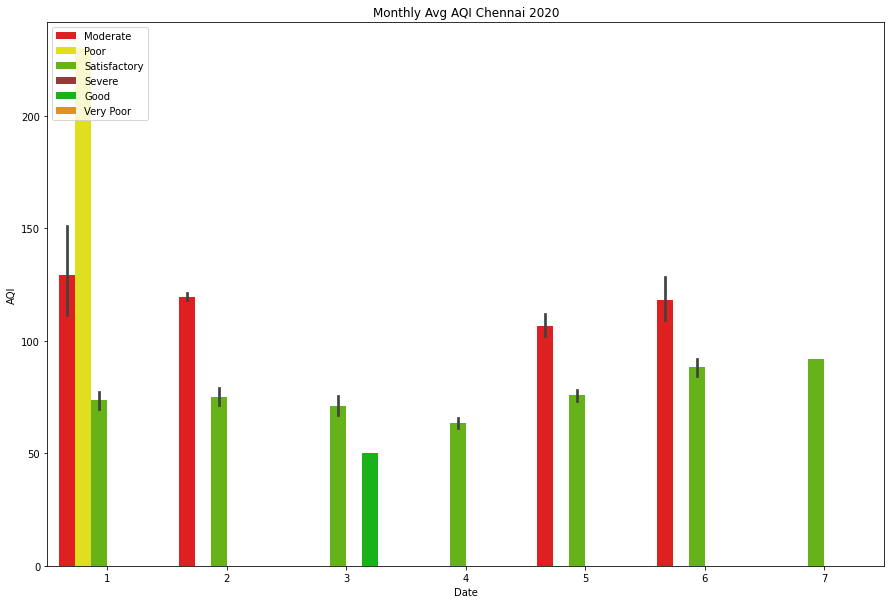

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x = ch_city_day[ch_city_day['Date'].dt.year == 2020]['Date'].dt.month , y = ch_city_day['AQI'],hue = ch_city_day['AQI_Bucket'],palette = colors)
plt.legend()
plt.title("Monthly Avg AQI Chennai 2020")
plt.savefig("ch_aqi_2020.png")
plt.show()

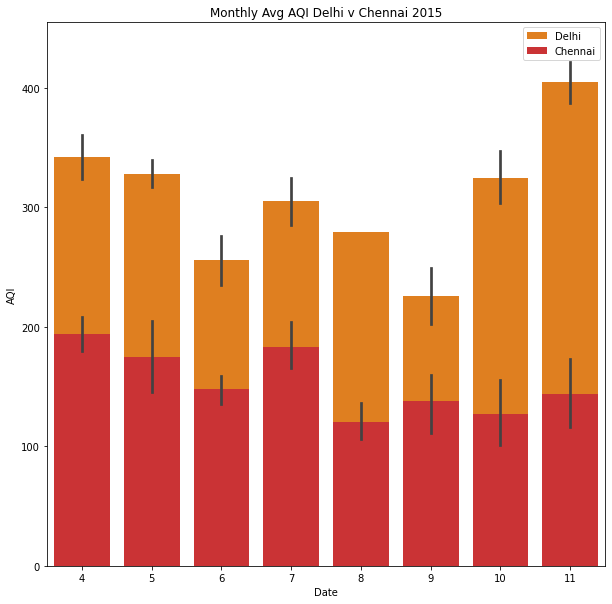

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x = d_city_day[d_city_day['Date'].dt.year == 2015]['Date'].dt.month , y = d_city_day['AQI'],color = '#ff7f00',label = "Delhi")
sns.barplot(x = ch_city_day[ch_city_day['Date'].dt.year == 2015]['Date'].dt.month , y = ch_city_day['AQI'],color = '#e31a1c',label = "Chennai")
plt.legend()
plt.title("Monthly Avg AQI Delhi v Chennai 2015")
plt.show()

In [ ]:
maxx = 500
minn = ch_city_day['AQI'].min()

# **Delhi Daily Analysis**

In [ ]:
def plot_heatmap(df,year):
    plt.figure(figsize=(25,10))
    ax = sns.heatmap(df , cmap = 'magma_r',annot = True,fmt = ".2f",linewidth = .5,annot_kws={'size':12},vmin = minn,vmax = maxx)
    plt.title(year, fontsize = 20)
    

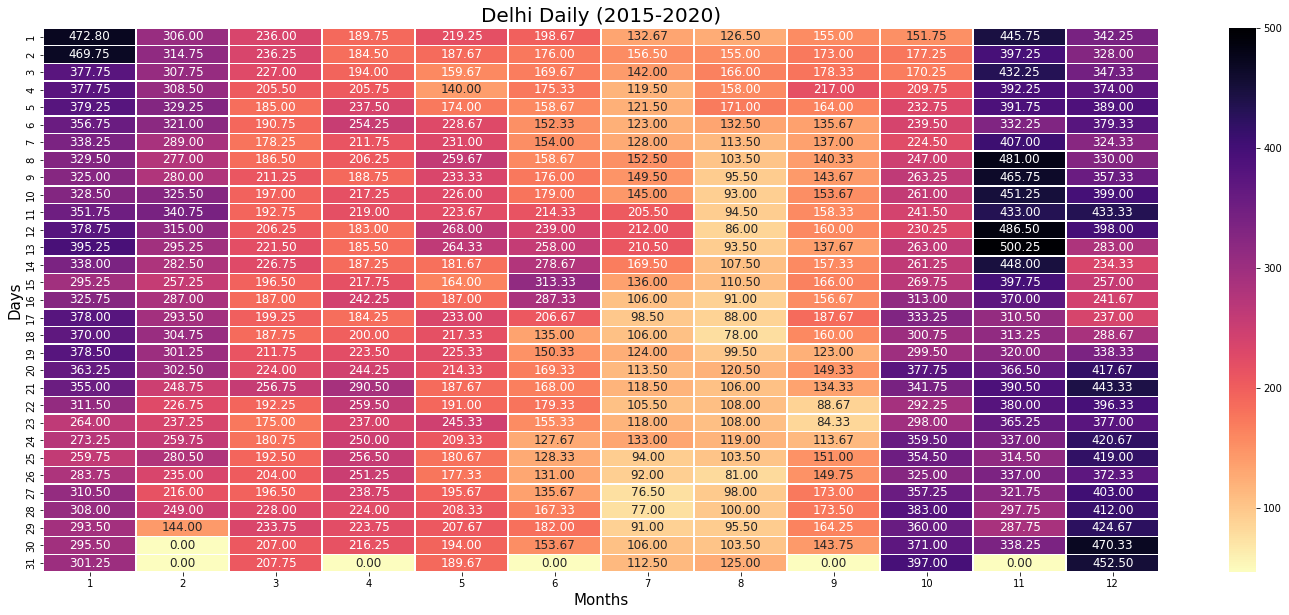

In [ ]:
df = pd.pivot_table(d_city_day,values = 'AQI',index = d_city_day['Date'].dt.day,columns = d_city_day['Date'].dt.month,fill_value = 0)
plot_heatmap(df,'Delhi Daily (2015-2020)')
plt.ylabel("Days",fontsize = 15)
plt.xlabel("Months",fontsize = 15)
plt.savefig('delhi_daily.png')

# **Delhi Weekly**

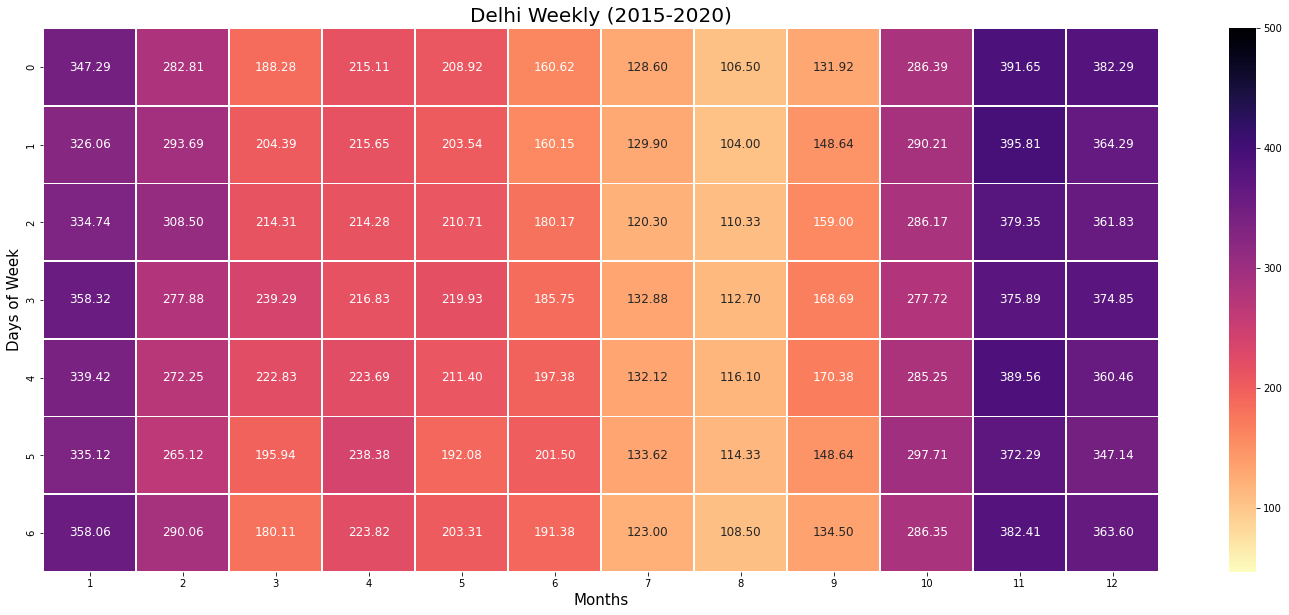

In [ ]:
df = pd.pivot_table(d_city_day,values = 'AQI',index = d_city_day['Date'].dt.weekday,columns = d_city_day['Date'].dt.month,fill_value = 0)
plot_heatmap(df,'Delhi Weekly (2015-2020)')
plt.ylabel("Days of Week",fontsize = 15)
plt.xlabel("Months",fontsize = 15)
plt.savefig('delhi_weekly.png')

# **Delhi Hourly Analysis**

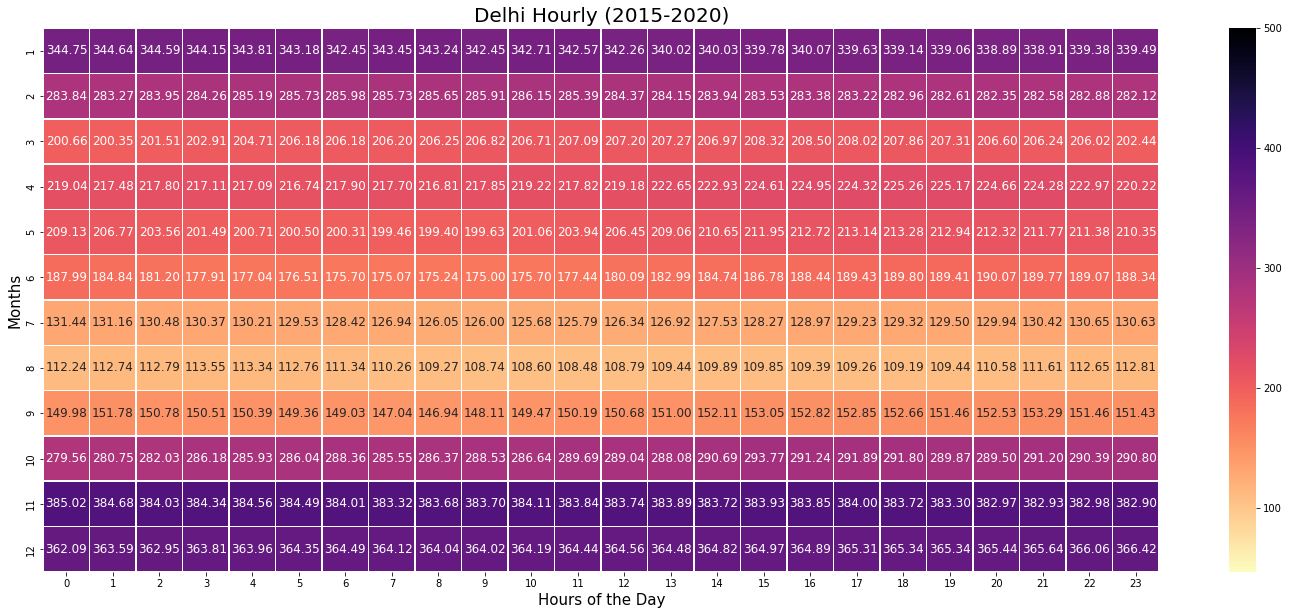

In [ ]:
df = pd.pivot_table(d_city_hour,values = 'AQI',columns = d_city_hour['Datetime'].dt.hour,index = d_city_hour['Datetime'].dt.month,fill_value = 0)
plot_heatmap(df,'Delhi Hourly (2015-2020)')
plt.ylabel("Months",fontsize = 15)
plt.xlabel("Hours of the Day",fontsize = 15)
plt.savefig('delhi_hourly.png')

# **Chennai Daily Analysis**

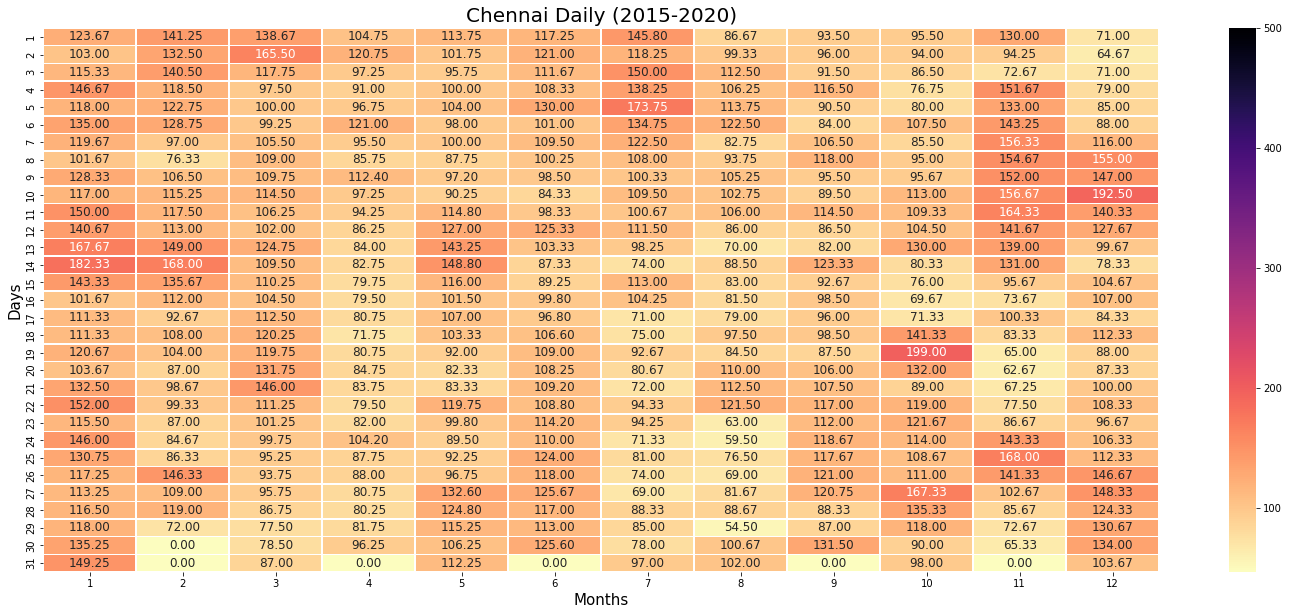

In [ ]:
df = pd.pivot_table(ch_city_day,values = 'AQI',index = ch_city_day['Date'].dt.day,columns = ch_city_day['Date'].dt.month,fill_value = 0)
plot_heatmap(df,'Chennai Daily (2015-2020)')
plt.ylabel("Days",fontsize = 15)
plt.xlabel("Months",fontsize = 15)
plt.savefig('chennai_daily.png')

# **Chennai Weekly Analysis**

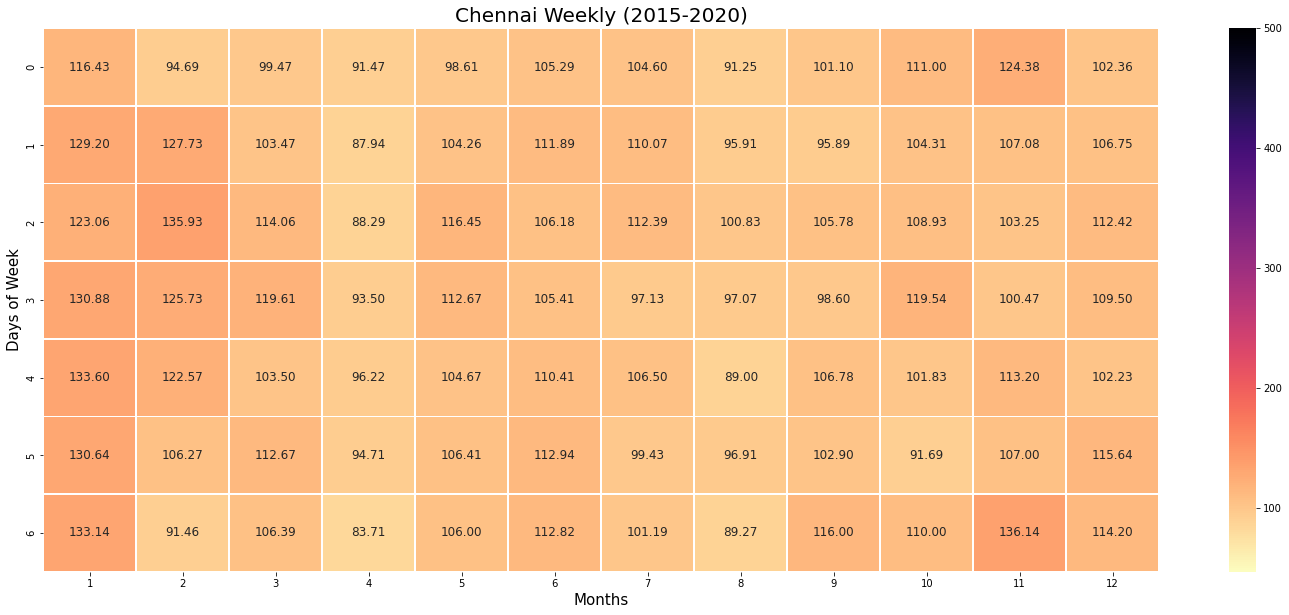

In [ ]:
df = pd.pivot_table(ch_city_day,values = 'AQI',index = ch_city_day['Date'].dt.weekday,columns = ch_city_day['Date'].dt.month,fill_value = 0)
plot_heatmap(df,'Chennai Weekly (2015-2020)')
plt.ylabel("Days of Week",fontsize = 15)
plt.xlabel("Months",fontsize = 15)
plt.savefig('chennai_weekly.png')

# **Chennai Hourly Analysis**

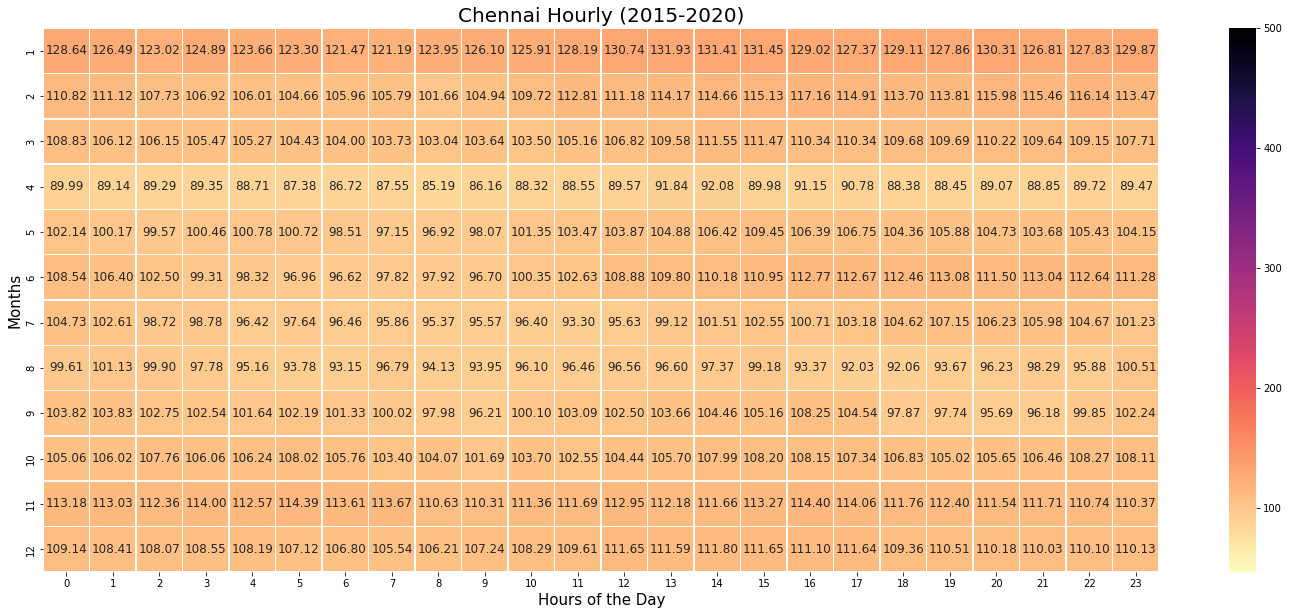

In [ ]:
df = pd.pivot_table(ch_city_hour,values = 'AQI',columns = ch_city_hour['Datetime'].dt.hour,index = ch_city_hour['Datetime'].dt.month,fill_value = 0)
plot_heatmap(df,'Chennai Hourly (2015-2020)')
plt.ylabel("Months",fontsize = 15)
plt.xlabel("Hours of the Day",fontsize = 15)
plt.savefig('chennai_hourly.png')

# **Correlation Heatmap B/w Pollutants**

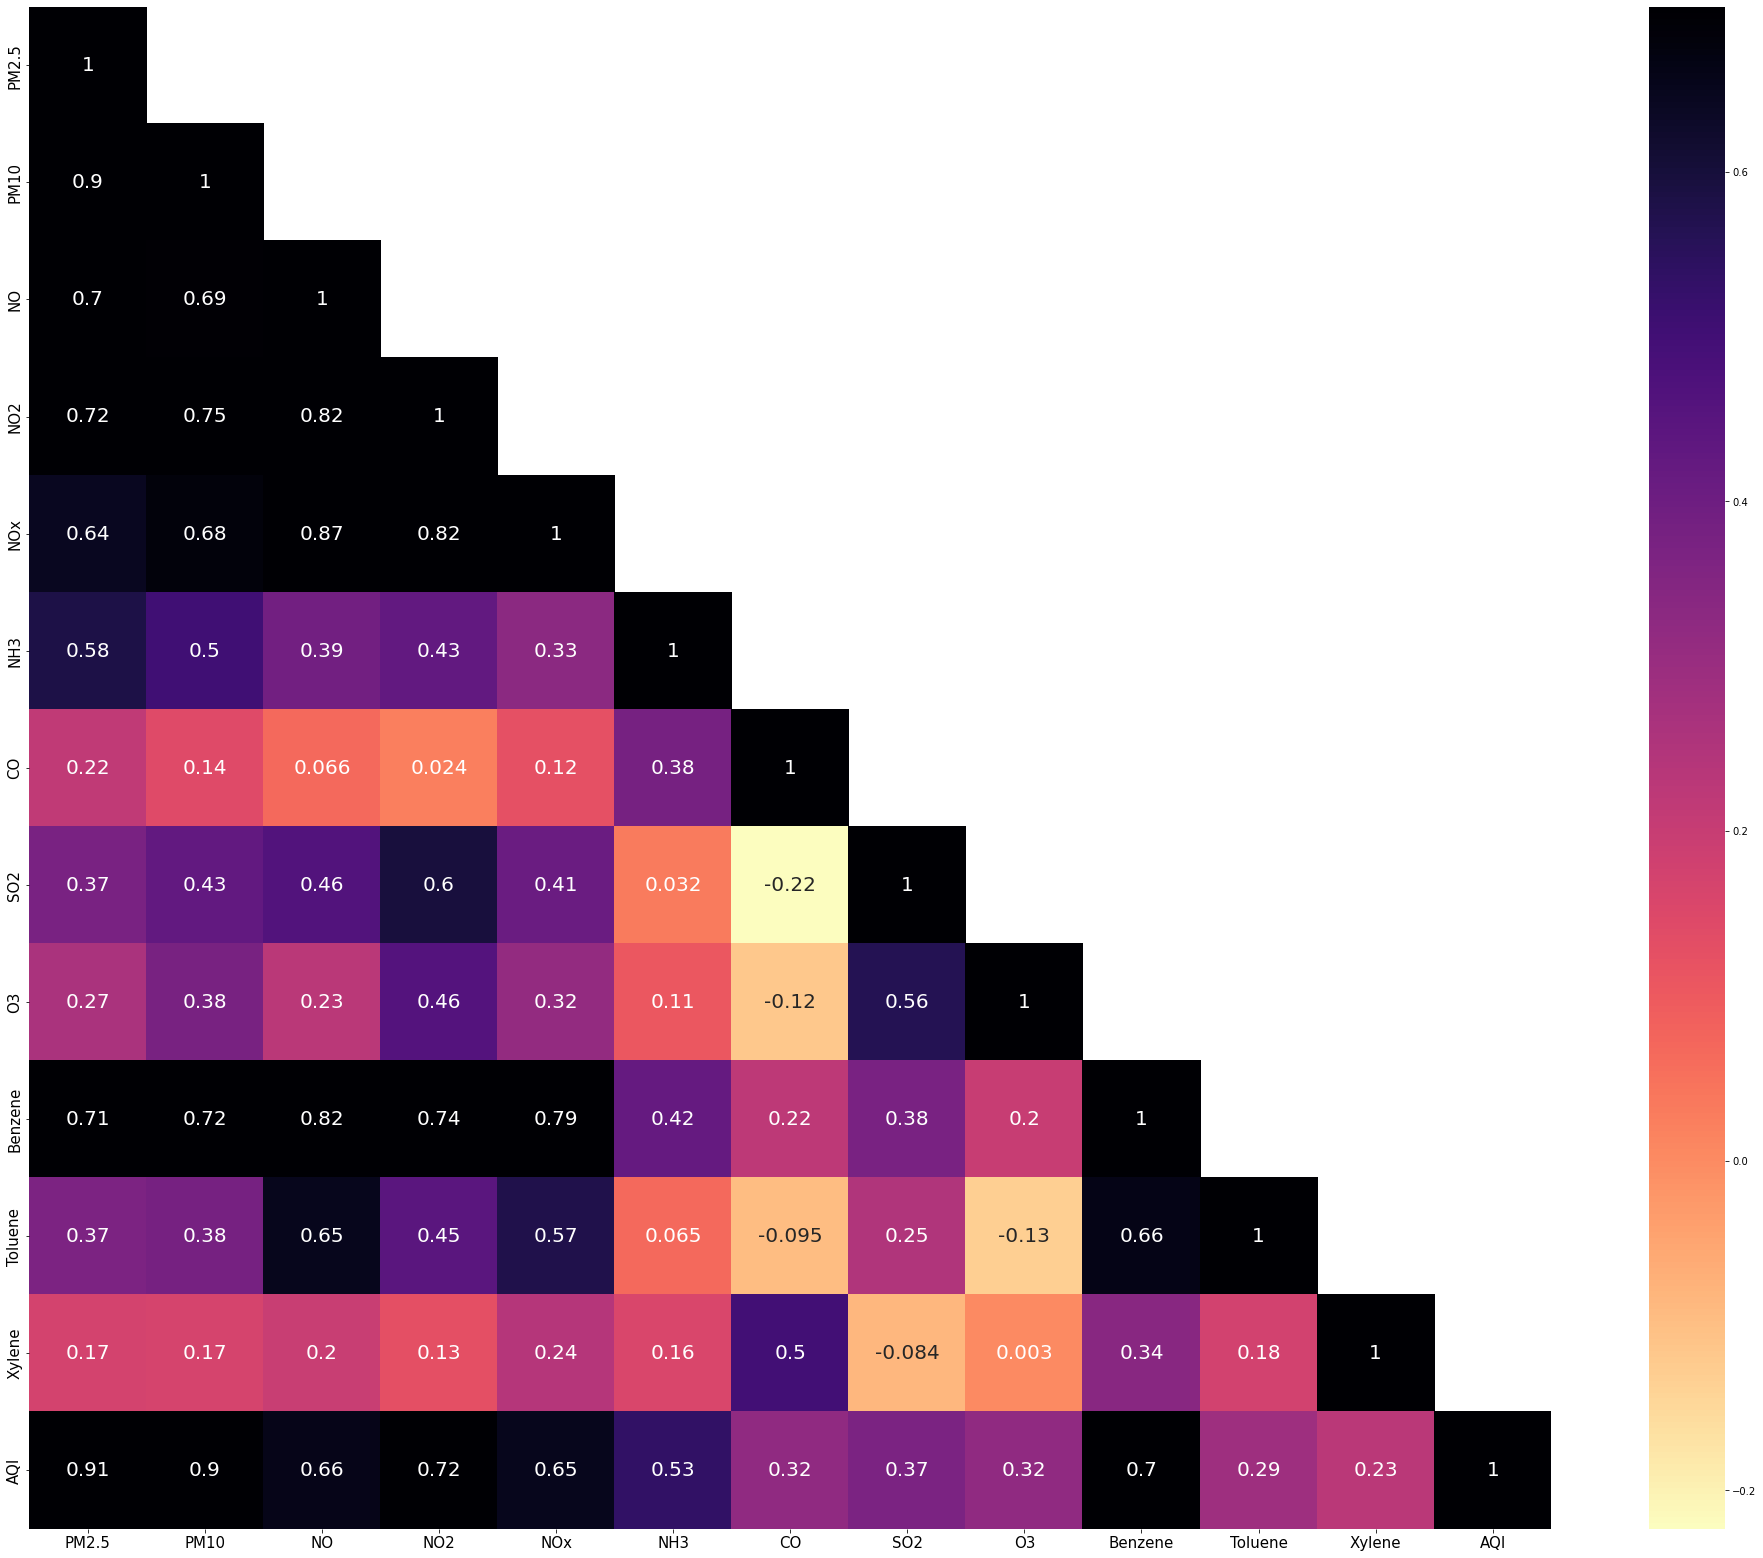

In [ ]:
correlation_map = d_city_day[d_city_day.columns].corr()
obj = np.array(correlation_map)
obj[np.tril_indices_from(obj)] = False
fig,ax= plt.subplots()
fig.set_size_inches(35,28)
ax = sns.heatmap(correlation_map,cmap = 'magma_r', mask=obj,vmax=.7, square=True,annot=True,annot_kws={"size": 20})
ax.tick_params(axis = "x",labelsize = 15)
ax.tick_params(axis = "y",labelsize = 15)
plt.savefig("HeatMap.png")

In [ ]:
train=d_city_day.drop(['AQI'],axis=1)
test=d_city_day['AQI']
train.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI_Bucket
10229,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,Severe
10230,Delhi,2015-01-02,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,Severe
10231,Delhi,2015-01-03,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,Moderate
10232,Delhi,2015-01-04,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,Very Poor
10233,Delhi,2015-01-05,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,Very Poor


# **Correlation with AQI(clear version)**

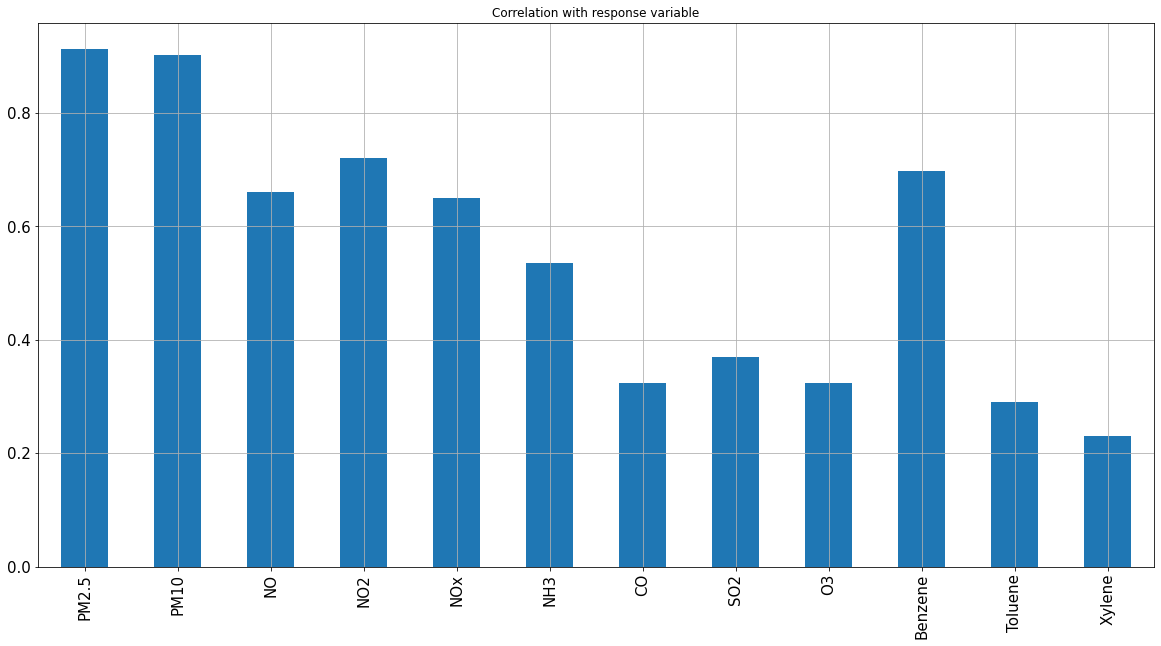

In [ ]:
train.corrwith(test).plot.bar(figsize=(20,10),title="Correlation with response variable",fontsize=15,rot=90,grid=True)

# **Exploring PM2.5 and PM10**

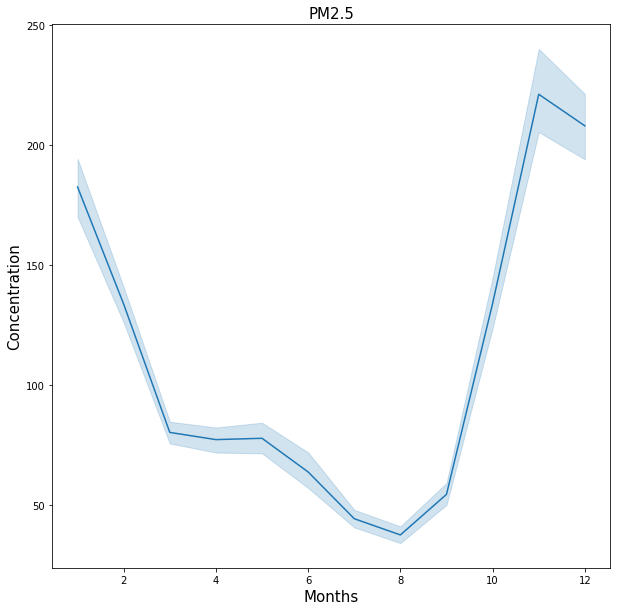

In [ ]:
plt.figure(figsize=(10,10))
sns.lineplot(x = d_city_day['Date'].dt.month , y = d_city_day['PM2.5'])
plt.ylabel("Concentration",fontsize = 15)
plt.xlabel("Months",fontsize = 15)
plt.title("PM2.5",fontsize = 15)
plt.savefig("PM25.png")

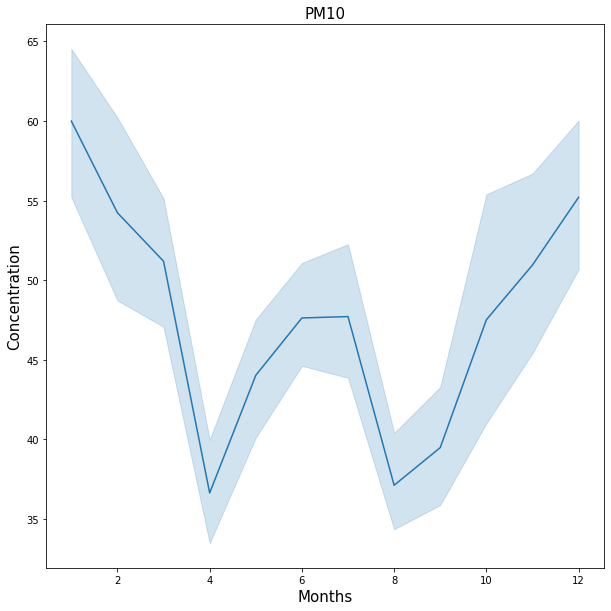

In [ ]:
plt.figure(figsize=(10,10))
sns.lineplot(x = ch_city_day['Date'].dt.month , y = ch_city_day['PM2.5'])
plt.ylabel("Concentration",fontsize = 15)
plt.xlabel("Months",fontsize = 15)
plt.title("PM10",fontsize = 15)
plt.savefig("PM10.png")

# **Exploring Demographic Variables**

In [ ]:
delhi_figures = {"Population":[25.8,26.7,27.60,28.51,29.39,30.29],"Growth":[3.30,3.30,3.30,3.30,3.10,3.03],"AQI":[d_city_day[d_city_day['Date'].dt.year == i]['AQI'].median() for i in range(2015,2021)],"Neighours":[5,5,5,5,5,5],"RV":[8.83,9.7,10.38,10.99,11.39,11.89]}
data = pd.DataFrame.from_dict(delhi_figures)

In [ ]:
ch_figures = {"Population":[9.677,9.930,10.18,10.45,10.71,10.97],"Growth":[2.61,2.61,2.61,2.62,2.44,2.43],"AQI":[ch_city_day[ch_city_day['Date'].dt.year == i]['AQI'].median() for i in range(2015,2021)],"Neighours":[3,3,3,3,3,3],"RV":[4.27,4.75,5.3,5.8,6.67,8]}
data = data.append(pd.DataFrame.from_dict(ch_figures))

In [ ]:
data.head()

,Population,Growth,AQI,Neighours,RV
0,25.80,3.3,320.0,5,8.83
1,26.70,3.3,463.0,5,9.70
2,27.60,3.3,340.0,5,10.38
3,28.51,3.3,243.0,5,10.99
4,29.39,3.1,209.0,5,11.39


# **Correlation between Demographic Variables**

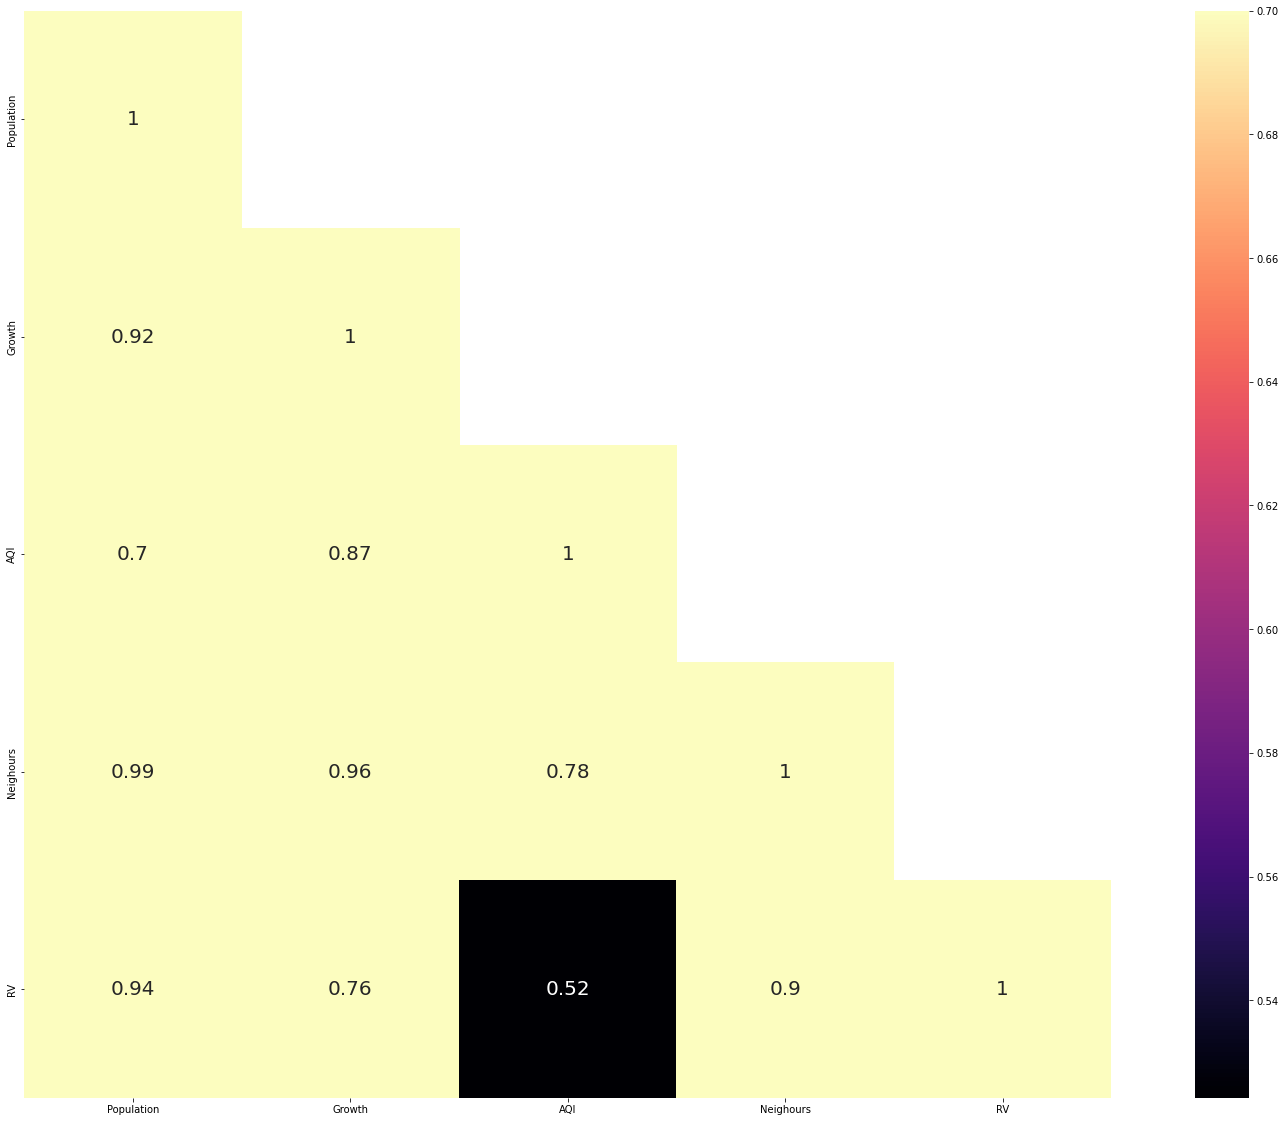

In [ ]:
correlation_map = data[data.columns].corr()
obj = np.array(correlation_map)
obj[np.tril_indices_from(obj)] = False
fig,ax= plt.subplots()
fig.set_size_inches(30,20)
sns.heatmap(correlation_map,cmap = 'magma', mask=obj,vmax=.7, square=True,annot=True,annot_kws={"size": 20})
plt.savefig("HeatMap.png")

In [ ]:
train=data.drop(['AQI'],axis=1)
test=data['AQI']
train.head()

,Population,Growth,Neighours,RV
0,25.80,3.3,5,8.83
1,26.70,3.3,5,9.70
2,27.60,3.3,5,10.38
3,28.51,3.3,5,10.99
4,29.39,3.1,5,11.39


# **Correlation with AQI**

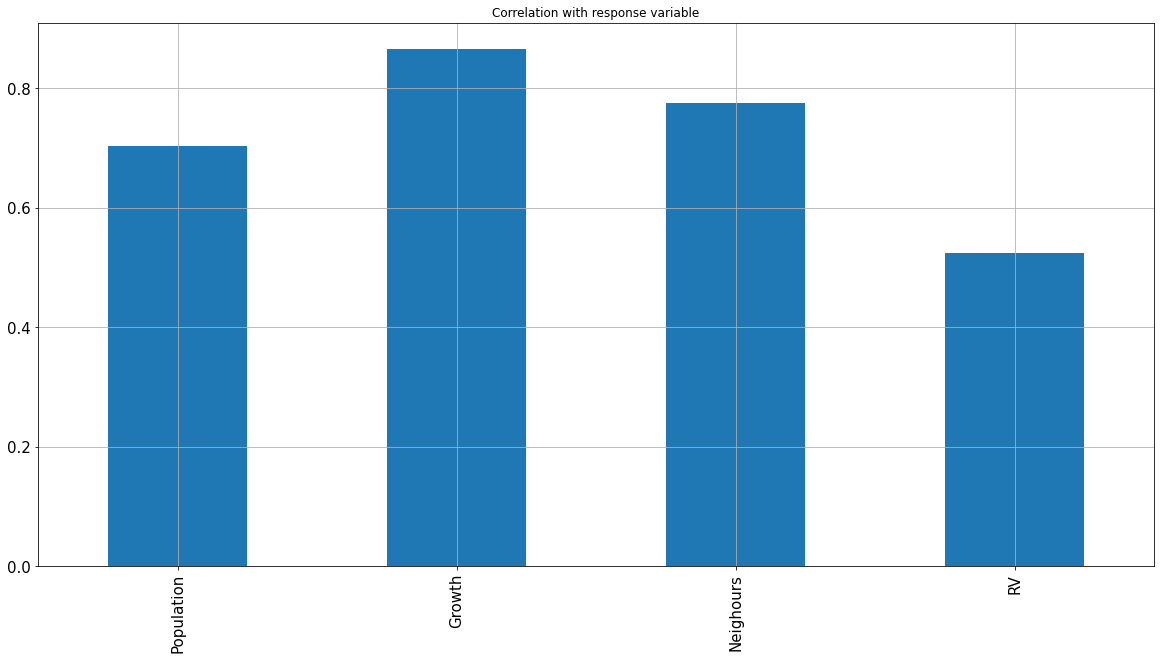

In [ ]:
train.corrwith(test).plot.bar(figsize=(20,10),title="Correlation with response variable",fontsize=15,rot=90,grid=True)
plt.savefig("correlation_test.png")

# **Weather and Temperature Data**

In [ ]:
chennai_weather='/content/drive/MyDrive/Kaggle/weather/Chennai.csv'
chennai_weather_data=pd.read_csv(chennai_weather)

In [ ]:
chennai_weather_data['Local time in Chennai / Meenambakkam (airport)'] = pd.to_datetime(chennai_weather_data['Local time in Chennai / Meenambakkam (airport)'])

In [ ]:
chennai_weather_data.rename(columns={"Local time in Chennai / Meenambakkam (airport)": "Date"},inplace="true")

In [ ]:
chennai_weather_data

,Date,T,Po,P,Pa,U,DD,Ff,ff10,ff3,N,WW,W1,W2,Tn,Tx,Cl,Nh,H,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
0,2020-01-12 23:30:00,26.0,758.7,760.0,-0.4,76.0,Wind blowing from the north-northeast,2.0,NaN,NaN,"90 or more, but not 100%",,NaN,NaN,NaN,NaN,Stratocumulus other than Stratocumulus cumulog...,50%.,600-1000,Altocumulus translucidus at a single level.,"Cirrus fibratus, sometimes uncinus, not progre...",4.0,21.5,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-12 20:30:00,26.4,759.1,760.5,1.5,74.0,Wind blowing from the north-northeast,3.0,NaN,NaN,60%.,,NaN,NaN,NaN,NaN,Stratocumulus other than Stratocumulus cumulog...,40%.,600-1000,Altocumulus translucidus at a single level.,"Cirrus fibratus, sometimes uncinus, not progre...",4.0,21.3,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-12 17:30:00,27.2,757.6,758.8,0.0,66.0,Wind blowing from the north-west,1.0,NaN,NaN,"90 or more, but not 100%",,NaN,NaN,NaN,29.6,Stratocumulus other than Stratocumulus cumulog...,40%.,600-1000,Altocumulus translucidus at a single level.,"Cirrus fibratus, sometimes uncinus, not progre...",4.0,20.2,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-12 14:30:00,29.0,757.6,759.0,-2.0,58.0,Wind blowing from the north-west,2.0,NaN,NaN,"90 or more, but not 100%",,NaN,NaN,NaN,NaN,Stratocumulus other than Stratocumulus cumulog...,50%.,600-1000,Altocumulus translucidus at a single level.,"Cirrus fibratus, sometimes uncinus, not progre...",10.0,19.9,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-12 11:30:00,29.0,759.6,760.9,-0.6,61.0,Wind blowing from the north-northwest,3.0,NaN,NaN,"90 or more, but not 100%",,NaN,NaN,NaN,NaN,Stratocumulus other than Stratocumulus cumulog...,50%.,600-1000,Altocumulus translucidus at a single level.,"Cirrus fibratus, sometimes uncinus, not progre...",10.0,20.6,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17246,2015-01-01 14:30:00,26.8,755.4,756.7,-2.1,84.0,"Calm, no wind",0.0,NaN,NaN,100%.,"Drizzle, not freezing, intermittent, slight at...",Rain.,Drizzle.,NaN,NaN,"Cumulonimbus capillatus (often with an anvil),...",50%.,300-600,Altocumulus translucidus or opacus in two or m...,NaN,4.0,23.9,NaN,NaN,NaN,NaN,NaN,NaN
17247,2015-01-01 11:30:00,28.4,757.5,758.8,0.1,72.0,"Calm, no wind",0.0,NaN,NaN,"90 or more, but not 100%",,NaN,NaN,NaN,NaN,Cumulus and Stratocumulus other than Stratocum...,60%.,300-600,Altocumulus translucidus at a single level.,"Cirrus fibratus, sometimes uncinus, not progre...",10.0,22.8,NaN,NaN,NaN,NaN,NaN,NaN
17248,2015-01-01 08:30:00,25.0,757.4,758.8,2.3,87.0,"Calm, no wind",0.0,NaN,NaN,60%.,Mist.,Cloud covering more than 1/2 of the sky during...,Cloud covering more than 1/2 of the sky during...,21.9,NaN,Stratocumulus other than Stratocumulus cumulog...,"10% or less, but not 0",600-1000,Altocumulus translucidus at a single level.,"Cirrus fibratus, sometimes uncinus, not progre...",2.0,22.6,NaN,NaN,NaN,NaN,NaN,NaN
17249,2015-01-01 05:30:00,23.2,755.1,756.4,0.2,91.0,"Calm, no wind",0.0,NaN,NaN,20–30%.,Mist.,Cloud covering more than 1/2 of the sky during...,Cloud covering 1/2 or less of the sky througho...,NaN,NaN,Stratocumulus other than Stratocumulus cumulog...,20–30%.,600-1000,"No Altocumulus, Altostratus or Nimbostratus.","No Cirrus, Cirrocumulus or Cirrostratus.",2.0,21.7,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
delhi_weather='/content/drive/MyDrive/Kaggle/weather/Delhi.csv'
delhi_weather_data=pd.read_csv(delhi_weather)

In [ ]:
delhi_weather_data['Local time in New Delhi / Indira Gandhi (airport)'] = pd.to_datetime(delhi_weather_data['Local time in New Delhi / Indira Gandhi (airport)'])

In [ ]:
delhi_weather_data.rename(columns={"Local time in New Delhi / Indira Gandhi (airport)": "Date"},inplace="true")

In [ ]:
delhi_weather_data

,Date,T,P0,P,U,DD,Ff,ff10,WW,W'W',c,VV,Td
0,2020-01-12 23:30:00,13.0,741.5,762.8,77.0,"Calm, no wind",0.0,NaN,Mist,NaN,No Significant Clouds,1.8,9.0
1,2020-01-12 23:00:00,15.0,741.7,762.8,68.0,"Calm, no wind",0.0,NaN,Haze,NaN,No Significant Clouds,1.8,9.0
2,2020-01-12 22:30:00,16.0,741.7,762.8,68.0,"Calm, no wind",0.0,NaN,Haze,NaN,No Significant Clouds,2.0,10.0
3,2020-01-12 22:00:00,16.0,741.7,762.8,63.0,"Calm, no wind",0.0,NaN,Haze,NaN,No Significant Clouds,2.0,9.0
4,2020-01-12 21:30:00,17.0,742.5,763.5,64.0,"Calm, no wind",0.0,NaN,Haze,NaN,No Significant Clouds,2.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65524,2017-01-27 12:30:00,17.0,743.3,764.3,83.0,Wind blowing from the west-northwest,5.0,NaN,Ground fog,NaN,"Scattered clouds (40-50%) 900 m, broken clouds...",0.8,14.0
65525,2017-01-27 12:00:00,17.0,743.9,765.0,83.0,Wind blowing from the north-west,5.0,NaN,Ground fog,NaN,"Scattered clouds (40-50%) 900 m, broken clouds...",0.8,14.0
65526,2017-01-27 11:30:00,16.0,743.9,765.0,88.0,Wind blowing from the north-west,4.0,NaN,Fog,NaN,"Scattered clouds (40-50%) 900 m, broken clouds...",0.8,14.0
65527,2017-01-27 11:00:00,16.0,743.9,765.0,88.0,Wind blowing from the west-northwest,4.0,NaN,Fog,NaN,"Scattered clouds (40-50%) 900 m, broken clouds...",0.5,14.0


In [ ]:
delhi_weather_data['Day'] = delhi_weather_data['Date'].dt.date

In [ ]:
delhi_weather_data.head()

,Date,T,P0,P,U,DD,Ff,ff10,WW,W'W',c,VV,Td,Day
0,2020-01-12 23:30:00,13.0,741.5,762.8,77.0,"Calm, no wind",0.0,NaN,Mist,NaN,No Significant Clouds,1.8,9.0,2020-01-12
1,2020-01-12 23:00:00,15.0,741.7,762.8,68.0,"Calm, no wind",0.0,NaN,Haze,NaN,No Significant Clouds,1.8,9.0,2020-01-12
2,2020-01-12 22:30:00,16.0,741.7,762.8,68.0,"Calm, no wind",0.0,NaN,Haze,NaN,No Significant Clouds,2.0,10.0,2020-01-12
3,2020-01-12 22:00:00,16.0,741.7,762.8,63.0,"Calm, no wind",0.0,NaN,Haze,NaN,No Significant Clouds,2.0,9.0,2020-01-12
4,2020-01-12 21:30:00,17.0,742.5,763.5,64.0,"Calm, no wind",0.0,NaN,Haze,NaN,No Significant Clouds,2.0,10.0,2020-01-12


In [ ]:
delhi_weather_data['Day'] = pd.to_datetime(delhi_weather_data['Day'])

In [ ]:
delhi_wd = pd.merge(d_city_day,delhi_weather_data,left_on='Date',right_on='Day',how='inner') 
delhi_wd.head()

,City,Date_x,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Date_y,T,P0,P,U,DD,Ff,ff10,WW,W'W',c,VV,Td,Day
0,Delhi,2017-09-26,66.12,114.15,23.12,27.52,18.35,34.54,0.6,7.13,30.45,0.25,1.38,0.13,131.0,Moderate,2017-09-26 23:30:00,28.0,735.4,755.4,74.0,"Calm, no wind",0.0,NaN,Smoke,NaN,No Significant Clouds,3.2,23.0,2017-09-26
1,Delhi,2017-09-26,66.12,114.15,23.12,27.52,18.35,34.54,0.6,7.13,30.45,0.25,1.38,0.13,131.0,Moderate,2017-09-26 23:00:00,29.0,735.4,755.4,70.0,"Calm, no wind",0.0,NaN,Smoke,NaN,No Significant Clouds,3.2,23.0,2017-09-26
2,Delhi,2017-09-26,66.12,114.15,23.12,27.52,18.35,34.54,0.6,7.13,30.45,0.25,1.38,0.13,131.0,Moderate,2017-09-26 22:30:00,29.0,735.4,755.4,70.0,"Calm, no wind",0.0,NaN,Smoke,NaN,No Significant Clouds,3.2,23.0,2017-09-26
3,Delhi,2017-09-26,66.12,114.15,23.12,27.52,18.35,34.54,0.6,7.13,30.45,0.25,1.38,0.13,131.0,Moderate,2017-09-26 22:00:00,29.0,735.4,755.4,70.0,"Calm, no wind",0.0,NaN,Smoke,NaN,No Significant Clouds,3.2,23.0,2017-09-26
4,Delhi,2017-09-26,66.12,114.15,23.12,27.52,18.35,34.54,0.6,7.13,30.45,0.25,1.38,0.13,131.0,Moderate,2017-09-26 21:30:00,31.0,735.6,755.4,62.0,"Calm, no wind",0.0,NaN,Smoke,NaN,No Significant Clouds,3.2,23.0,2017-09-26


In [ ]:
delhi_wd.shape

(46702, 30)

In [ ]:
chennai_weather_data['Day'] = chennai_weather_data['Date'].dt.date
chennai_weather_data['Day'] = pd.to_datetime(chennai_weather_data['Day'])
chennai_weather_data.head()

,Date,T,Po,P,Pa,U,DD,Ff,ff10,ff3,N,WW,W1,W2,Tn,Tx,Cl,Nh,H,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss,Day
0,2020-01-12 23:30:00,26.0,758.7,760.0,-0.4,76.0,Wind blowing from the north-northeast,2.0,NaN,NaN,"90 or more, but not 100%",,NaN,NaN,NaN,NaN,Stratocumulus other than Stratocumulus cumulog...,50%.,600-1000,Altocumulus translucidus at a single level.,"Cirrus fibratus, sometimes uncinus, not progre...",4.0,21.5,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-12
1,2020-01-12 20:30:00,26.4,759.1,760.5,1.5,74.0,Wind blowing from the north-northeast,3.0,NaN,NaN,60%.,,NaN,NaN,NaN,NaN,Stratocumulus other than Stratocumulus cumulog...,40%.,600-1000,Altocumulus translucidus at a single level.,"Cirrus fibratus, sometimes uncinus, not progre...",4.0,21.3,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-12
2,2020-01-12 17:30:00,27.2,757.6,758.8,0.0,66.0,Wind blowing from the north-west,1.0,NaN,NaN,"90 or more, but not 100%",,NaN,NaN,NaN,29.6,Stratocumulus other than Stratocumulus cumulog...,40%.,600-1000,Altocumulus translucidus at a single level.,"Cirrus fibratus, sometimes uncinus, not progre...",4.0,20.2,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-12
3,2020-01-12 14:30:00,29.0,757.6,759.0,-2.0,58.0,Wind blowing from the north-west,2.0,NaN,NaN,"90 or more, but not 100%",,NaN,NaN,NaN,NaN,Stratocumulus other than Stratocumulus cumulog...,50%.,600-1000,Altocumulus translucidus at a single level.,"Cirrus fibratus, sometimes uncinus, not progre...",10.0,19.9,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-12
4,2020-01-12 11:30:00,29.0,759.6,760.9,-0.6,61.0,Wind blowing from the north-northwest,3.0,NaN,NaN,"90 or more, but not 100%",,NaN,NaN,NaN,NaN,Stratocumulus other than Stratocumulus cumulog...,50%.,600-1000,Altocumulus translucidus at a single level.,"Cirrus fibratus, sometimes uncinus, not progre...",10.0,20.6,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-12


In [ ]:
chennai_wd = pd.merge(ch_city_day, chennai_weather_data, left_on='Date',right_on='Day',how='inner')
chennai_wd.head()

,City,Date_x,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket,Date_y,T,Po,P,Pa,U,DD,Ff,ff10,ff3,N,WW,W1,W2,Tn,Tx,Cl,Nh,H,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss,Day
0,Chennai,2015-04-06,83.19,50.245,9.46,16.84,15.85,12.35,3.42,5.63,23.22,0.14,5.12,193.0,Moderate,2015-04-06 23:30:00,29.6,754.5,755.8,0.6,83.0,Wind blowing from the south,2.0,NaN,NaN,40%.,,NaN,NaN,NaN,NaN,Stratocumulus other than Stratocumulus cumulog...,20–30%.,600-1000,"No Altocumulus, Altostratus or Nimbostratus.","Cirrus fibratus, sometimes uncinus, not progre...",4.0,26.5,NaN,NaN,NaN,NaN,NaN,NaN,2015-04-06
1,Chennai,2015-04-06,83.19,50.245,9.46,16.84,15.85,12.35,3.42,5.63,23.22,0.14,5.12,193.0,Moderate,2015-04-06 20:30:00,29.8,753.9,755.2,2.3,82.0,Wind blowing from the south-east,3.0,NaN,NaN,40%.,,NaN,NaN,NaN,NaN,Stratocumulus other than Stratocumulus cumulog...,20–30%.,600-1000,"No Altocumulus, Altostratus or Nimbostratus.","Cirrus fibratus, sometimes uncinus, not progre...",4.0,26.5,NaN,NaN,NaN,NaN,NaN,NaN,2015-04-06
2,Chennai,2015-04-06,83.19,50.245,9.46,16.84,15.85,12.35,3.42,5.63,23.22,0.14,5.12,193.0,Moderate,2015-04-06 17:30:00,32.8,751.6,752.9,-0.9,61.0,Wind blowing from the south-southeast,3.0,NaN,NaN,70 – 80%.,State of sky on the whole unchanged.,Thunderstorm(s) with or without precipitation.,Cloud covering more than 1/2 of the sky throug...,NaN,37.8,"Cumulonimbus calvus, with or without Cumulus, ...",20–30%.,600-1000,Altocumulus translucidus at a single level.,"Cirrus fibratus, sometimes uncinus, not progre...",10.0,24.3,NaN,NaN,NaN,NaN,NaN,NaN,2015-04-06
3,Chennai,2015-04-06,83.19,50.245,9.46,16.84,15.85,12.35,3.42,5.63,23.22,0.14,5.12,193.0,Moderate,2015-04-06 14:30:00,35.8,752.5,753.8,-1.8,53.0,Wind blowing from the south-southeast,5.0,NaN,NaN,60%.,"Thunderstorm, but no precipitation at the time...",Cloud covering more than 1/2 of the sky throug...,Cloud covering more than 1/2 of the sky during...,NaN,NaN,"Cumulonimbus capillatus (often with an anvil),...",40%.,600-1000,Altocumulus translucidus at a single level.,"Cirrus fibratus, sometimes uncinus, not progre...",10.0,24.8,NaN,NaN,NaN,NaN,NaN,NaN,2015-04-06
4,Chennai,2015-04-06,83.19,50.245,9.46,16.84,15.85,12.35,3.42,5.63,23.22,0.14,5.12,193.0,Moderate,2015-04-06 11:30:00,NaN,754.3,755.6,-0.3,NaN,NaN,NaN,NaN,NaN,"10% or less, but not 0",,NaN,NaN,NaN,NaN,Stratocumulus other than Stratocumulus cumulog...,50%.,Less than 50,"No Altocumulus, Altostratus or Nimbostratus.","Cirrus fibratus, sometimes uncinus, not progre...",0.3,23.6,NaN,NaN,NaN,NaN,NaN,NaN,2015-04-06


In [ ]:
chennai_wd.shape

(9837, 45)

In [ ]:
check_null(delhi_wd)

City : 0.0
Date_x : 0.0
PM2.5 : 0.0
PM10 : 0.0
NO : 0.0
NO2 : 0.0
NOx : 0.0
NH3 : 0.0
CO : 0.0
SO2 : 0.0
O3 : 0.0
Benzene : 0.0
Toluene : 0.0
Xylene : 0.0
AQI : 0.0
AQI_Bucket : 0.0
Date_y : 0.0
T : 0.05353089803434543
P0 : 0.07708449316945741
P : 0.023553595135111984
U : 0.05995460579846688
DD : 0.04496595434885016
Ff : 0.04496595434885016
ff10 : 94.94882446147916
WW : 0.49034302599460405
W'W' : 100.0
c : 0.10277932422594321
VV : 0.05353089803434543
Td : 0.05995460579846688
Day : 0.0


In [ ]:
check_null(chennai_wd)

City : 0.0
Date_x : 0.0
PM2.5 : 0.0
PM10 : 0.0
NO : 0.0
NO2 : 0.0
NOx : 0.0
NH3 : 0.0
CO : 0.0
SO2 : 0.0
O3 : 0.0
Benzene : 0.0
Toluene : 0.0
AQI : 0.0
AQI_Bucket : 0.0
Date_y : 0.0
T : 0.142319812951103
Po : 0.0
P : 0.04066280370031514
Pa : 0.5591135508793331
U : 0.18298261665141813
DD : 0.09149130832570906
Ff : 0.08132560740063027
ff10 : 99.98983429907491
ff3 : 100.0
N : 0.0
WW : 0.0
W1 : 82.4641659042391
W2 : 82.4641659042391
Tn : 87.52668496492834
Tx : 87.49618786215309
Cl : 3.2733556978753686
Nh : 3.2733556978753686
H : 3.1615329876995015
Cm : 3.3140185015756836
Ch : 16.132967368100033
VV : 0.0
Td : 0.05082850462539392
RRR : 97.7940428992579
tR : 97.7940428992579
E : 100.0
Tg : 100.0
E' : 100.0
sss : 100.0
Day : 0.0


In [ ]:
delhi_wd['T'].replace(np.nan,delhi_wd['T'].median(),inplace = True)
delhi_wd['P0'].replace(np.nan,delhi_wd['P0'].median(),inplace = True) 
delhi_wd['P'].replace(np.nan,delhi_wd['P'].median(),inplace = True)
delhi_wd['U'].replace(np.nan,delhi_wd['U'].median(),inplace = True)
delhi_wd['Ff'].replace(np.nan,delhi_wd['Ff'].median(),inplace = True)
delhi_wd['VV'].replace(np.nan,delhi_wd['VV'].median(),inplace=True)
delhi_wd['Td'].replace(np.nan,delhi_wd['Td'].median(),inplace = True)
delhi_wd.drop(columns=['W\'W\'','City','Date_y','Day','ff10','c'],axis = 1,inplace = True)
delhi_wd.dropna(axis=0,inplace = True)
delhi_wd.rename(columns={'Date_x':'Date'},inplace = True)
delhi_wd.head()

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,T,P0,P,U,DD,Ff,WW,VV,Td
0,2017-09-26,66.12,114.15,23.12,27.52,18.35,34.54,0.6,7.13,30.45,0.25,1.38,0.13,131.0,Moderate,28.0,735.4,755.4,74.0,"Calm, no wind",0.0,Smoke,3.2,23.0
1,2017-09-26,66.12,114.15,23.12,27.52,18.35,34.54,0.6,7.13,30.45,0.25,1.38,0.13,131.0,Moderate,29.0,735.4,755.4,70.0,"Calm, no wind",0.0,Smoke,3.2,23.0
2,2017-09-26,66.12,114.15,23.12,27.52,18.35,34.54,0.6,7.13,30.45,0.25,1.38,0.13,131.0,Moderate,29.0,735.4,755.4,70.0,"Calm, no wind",0.0,Smoke,3.2,23.0
3,2017-09-26,66.12,114.15,23.12,27.52,18.35,34.54,0.6,7.13,30.45,0.25,1.38,0.13,131.0,Moderate,29.0,735.4,755.4,70.0,"Calm, no wind",0.0,Smoke,3.2,23.0
4,2017-09-26,66.12,114.15,23.12,27.52,18.35,34.54,0.6,7.13,30.45,0.25,1.38,0.13,131.0,Moderate,31.0,735.6,755.4,62.0,"Calm, no wind",0.0,Smoke,3.2,23.0


In [ ]:
delhi_wd['DD'].unique()

array(['Calm, no wind', 'Wind blowing from the north-west',
       'Wind blowing from the north-northwest',
       'Wind blowing from the west-northwest',
       'Wind blowing from the west', 'Wind blowing from the north-east',
       'variable wind direction', 'Wind blowing from the north',
       'Wind blowing from the north-northeast',
       'Wind blowing from the south-west',
       'Wind blowing from the west-southwest',
       'Wind blowing from the south-southeast',
       'Wind blowing from the east',
       'Wind blowing from the east-southeast',
       'Wind blowing from the south-east',
       'Wind blowing from the south-southwest',
       'Wind blowing from the south',
       'Wind blowing from the east-northeast'], dtype=object)

In [ ]:
delhi_wd['WW'].unique()

array(['Smoke', 'Haze', 'Mist', 'Ground fog', 'Fog', 'Light drizzle',
       'Thunderstorm', 'Rain', 'Widespread dust',
       'Light thunderstorm, rain', 'Blowing widespread dust',
       'Thunderstorm, rain', 'In the vicinity rain', 'Drizzle',
       'Mist,ground fog', 'Light rain', 'Duststorm, thunderstorm',
       'Thunderstorm, drizzle', 'Thunderstorm, duststorm', 'Heavy rain',
       'Heavy thunderstorm, rain', 'Duststorm', 'Ground fog, mist',
       'Blowing widespread dust, drizzle', 'In the vicinity thunderstorm',
       'Thunderstorm, rain, small hail and/or snow pellets',
       'Shower(s), rain', 'Light thunderstorm'], dtype=object)

In [ ]:
chennai_wd['T'].replace(np.nan,chennai_wd['T'].median(),inplace = True)
chennai_wd['Po'].replace(np.nan,chennai_wd['Po'].median(),inplace = True) 
chennai_wd['P'].replace(np.nan,chennai_wd['P'].median(),inplace = True)
chennai_wd['U'].replace(np.nan,chennai_wd['U'].median(),inplace = True)
chennai_wd['Ff'].replace(np.nan,chennai_wd['Ff'].median(),inplace = True)
chennai_wd['Td'].replace(np.nan,chennai_wd['Td'].median(),inplace = True)
chennai_wd.drop(columns=['W1','W2','Tn','Tx','Cl','Nh','H','Cm','Ch','RRR','tR','E','Tg','E\'' ,'sss','ff10','ff3','Date_y','Day','City','Pa','N'],axis=1,inplace = True)
chennai_wd.dropna(axis=0,inplace=True)
chennai_wd.rename(columns={'Date_x':'Date'},inplace=True)
check_null(chennai_wd)

Date : 0.0
PM2.5 : 0.0
PM10 : 0.0
NO : 0.0
NO2 : 0.0
NOx : 0.0
NH3 : 0.0
CO : 0.0
SO2 : 0.0
O3 : 0.0
Benzene : 0.0
Toluene : 0.0
AQI : 0.0
AQI_Bucket : 0.0
T : 0.0
Po : 0.0
P : 0.0
U : 0.0
DD : 0.0
Ff : 0.0
WW : 0.0
VV : 0.0
Td : 0.0


In [ ]:
chennai_wd['WW'].value_counts()

                                                                                                                                                8103
State of sky on the whole unchanged.                                                                                                             396
Haze.                                                                                                                                            359
Mist.                                                                                                                                            204
Drizzle, not freezing, intermittent, slight at time of observation.                                                                              179
Drizzle (not freezing) or snow grains not falling as shower(s).                                                                                  120
Rain, not freezing, intermittent, slight at time of observation.                                          

In [ ]:
chennai_wd['WW'].replace(' ','State of sky on the whole unchanged. ',inplace = True)
chennai_wd['WW'].value_counts()

State of sky on the whole unchanged.                                                                                                            8499
Haze.                                                                                                                                            359
Mist.                                                                                                                                            204
Drizzle, not freezing, intermittent, slight at time of observation.                                                                              179
Drizzle (not freezing) or snow grains not falling as shower(s).                                                                                  120
Rain, not freezing, intermittent, slight at time of observation.                                                                                  77
Lightning visible, no thunder heard.                                                                      

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_dd_ch,label_ww_ch,label_dd_d,label_ww_d=LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder()
delhi_wd['DD'] = label_dd_d.fit_transform(delhi_wd['DD'])
delhi_wd['WW'] = label_ww_d.fit_transform(delhi_wd['WW'])
chennai_wd['DD'] = label_dd_ch.fit_transform(chennai_wd['DD'])
chennai_wd['WW'] = label_ww_ch.fit_transform(chennai_wd['WW'])



In [ ]:
delhi_wd.head()

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,T,P0,P,U,DD,Ff,WW,VV,Td
0,2017-09-26,66.12,114.15,23.12,27.52,18.35,34.54,0.6,7.13,30.45,0.25,1.38,0.13,131.0,Moderate,28.0,735.4,755.4,74.0,0,0.0,21,3.2,23.0
1,2017-09-26,66.12,114.15,23.12,27.52,18.35,34.54,0.6,7.13,30.45,0.25,1.38,0.13,131.0,Moderate,29.0,735.4,755.4,70.0,0,0.0,21,3.2,23.0
2,2017-09-26,66.12,114.15,23.12,27.52,18.35,34.54,0.6,7.13,30.45,0.25,1.38,0.13,131.0,Moderate,29.0,735.4,755.4,70.0,0,0.0,21,3.2,23.0
3,2017-09-26,66.12,114.15,23.12,27.52,18.35,34.54,0.6,7.13,30.45,0.25,1.38,0.13,131.0,Moderate,29.0,735.4,755.4,70.0,0,0.0,21,3.2,23.0
4,2017-09-26,66.12,114.15,23.12,27.52,18.35,34.54,0.6,7.13,30.45,0.25,1.38,0.13,131.0,Moderate,31.0,735.6,755.4,62.0,0,0.0,21,3.2,23.0


#**Studying Correlation with Weather Variables as Well**

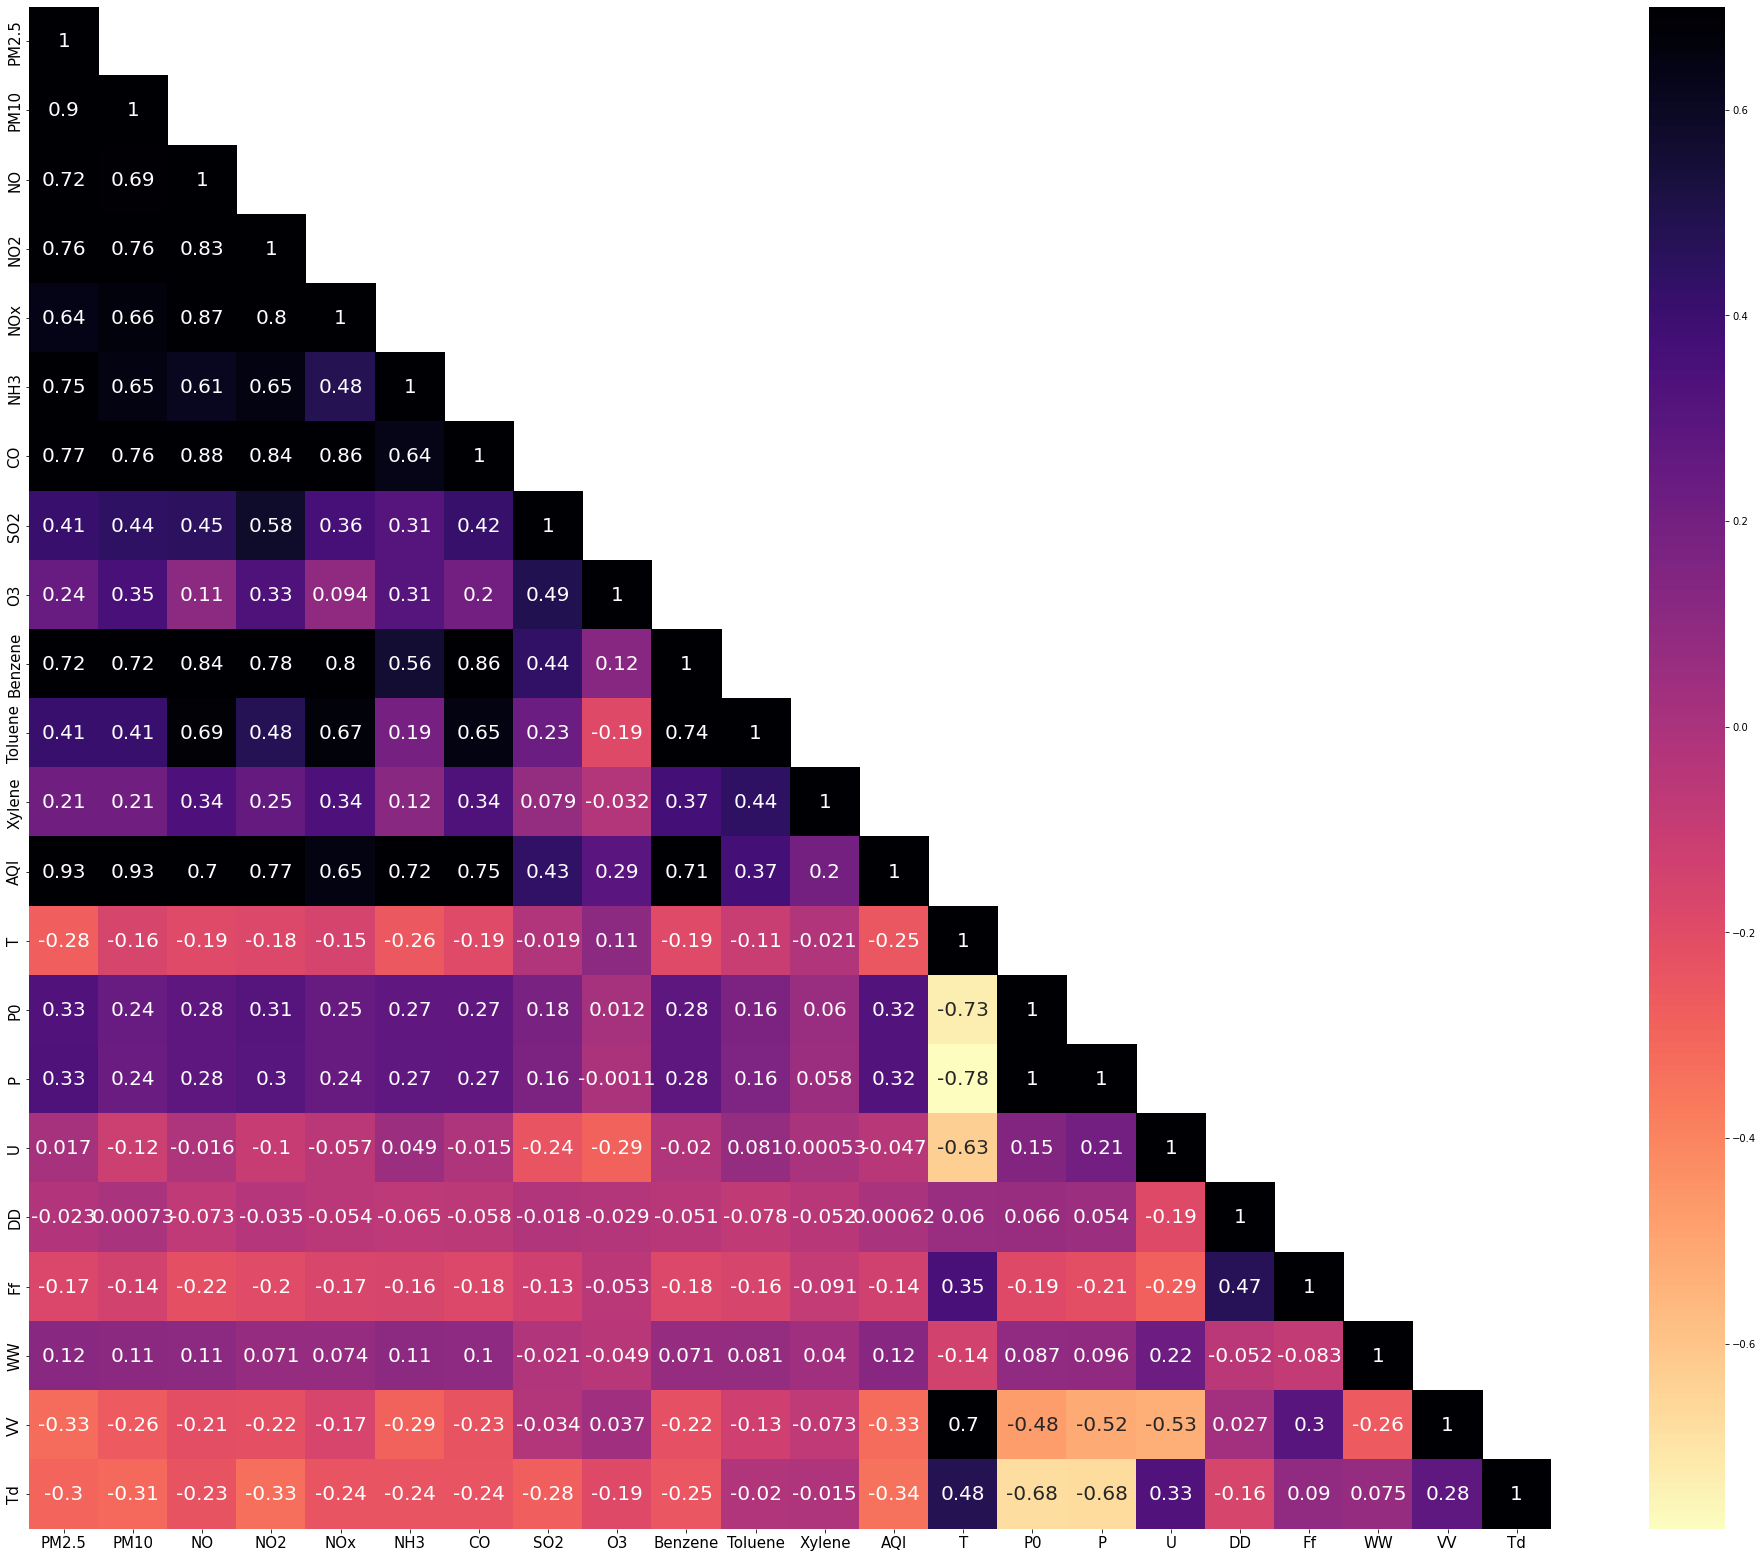

In [ ]:
correlation_map = delhi_wd[delhi_wd.columns].corr()
obj = np.array(correlation_map)
obj[np.tril_indices_from(obj)] = False
fig,ax= plt.subplots()
fig.set_size_inches(35,28)
ax = sns.heatmap(correlation_map,cmap = 'magma_r', mask=obj,vmax=.7, square=True,annot=True,annot_kws={"size": 20})
ax.tick_params(axis = "x",labelsize = 15)
ax.tick_params(axis = "y",labelsize = 15)
plt.savefig("delhi_wd_hm.png")

In [ ]:
train=delhi_wd.drop(['AQI'],axis=1)
test=d_city_day['AQI']
train.head()

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI_Bucket,T,P0,P,U,DD,Ff,WW,VV,Td
0,2017-09-26,66.12,114.15,23.12,27.52,18.35,34.54,0.6,7.13,30.45,0.25,1.38,0.13,Moderate,28.0,735.4,755.4,74.0,0,0.0,21,3.2,23.0
1,2017-09-26,66.12,114.15,23.12,27.52,18.35,34.54,0.6,7.13,30.45,0.25,1.38,0.13,Moderate,29.0,735.4,755.4,70.0,0,0.0,21,3.2,23.0
2,2017-09-26,66.12,114.15,23.12,27.52,18.35,34.54,0.6,7.13,30.45,0.25,1.38,0.13,Moderate,29.0,735.4,755.4,70.0,0,0.0,21,3.2,23.0
3,2017-09-26,66.12,114.15,23.12,27.52,18.35,34.54,0.6,7.13,30.45,0.25,1.38,0.13,Moderate,29.0,735.4,755.4,70.0,0,0.0,21,3.2,23.0
4,2017-09-26,66.12,114.15,23.12,27.52,18.35,34.54,0.6,7.13,30.45,0.25,1.38,0.13,Moderate,31.0,735.6,755.4,62.0,0,0.0,21,3.2,23.0


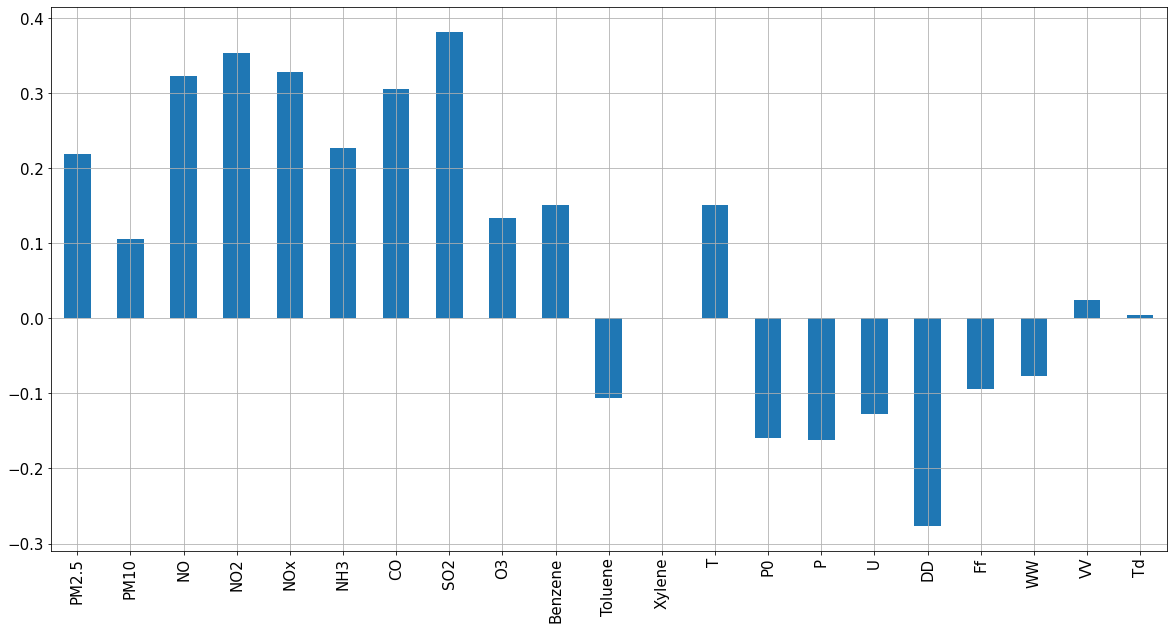

In [ ]:
train.corrwith(test).plot.bar(figsize=(20,10),fontsize=15,rot=90,grid=True)
plt.savefig("delhi_wd_ct.png")

In [ ]:
delhi_wd.drop(['Toluene','Xylene','Ff','WW'], axis=1)

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,AQI,AQI_Bucket,T,P0,P,U,DD,VV,Td
0,2017-09-26,66.12,114.15,23.12,27.52,18.35,34.54,0.60,7.13,30.45,0.25,131.0,Moderate,28.0,735.4,755.4,74.0,0,3.2,23.0
1,2017-09-26,66.12,114.15,23.12,27.52,18.35,34.54,0.60,7.13,30.45,0.25,131.0,Moderate,29.0,735.4,755.4,70.0,0,3.2,23.0
2,2017-09-26,66.12,114.15,23.12,27.52,18.35,34.54,0.60,7.13,30.45,0.25,131.0,Moderate,29.0,735.4,755.4,70.0,0,3.2,23.0
3,2017-09-26,66.12,114.15,23.12,27.52,18.35,34.54,0.60,7.13,30.45,0.25,131.0,Moderate,29.0,735.4,755.4,70.0,0,3.2,23.0
4,2017-09-26,66.12,114.15,23.12,27.52,18.35,34.54,0.60,7.13,30.45,0.25,131.0,Moderate,31.0,735.6,755.4,62.0,0,3.2,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46697,2020-07-01,54.01,128.66,6.33,21.05,16.81,29.06,0.97,11.15,29.73,2.03,101.0,Moderate,14.0,742.3,763.5,88.0,0,2.0,12.0
46698,2020-07-01,54.01,128.66,6.33,21.05,16.81,29.06,0.97,11.15,29.73,2.03,101.0,Moderate,14.0,742.3,763.5,88.0,0,2.0,12.0
46699,2020-07-01,54.01,128.66,6.33,21.05,16.81,29.06,0.97,11.15,29.73,2.03,101.0,Moderate,14.0,742.3,763.5,88.0,2,2.0,12.0
46700,2020-07-01,54.01,128.66,6.33,21.05,16.81,29.06,0.97,11.15,29.73,2.03,101.0,Moderate,14.0,741.6,762.8,88.0,1,2.0,12.0


#**Implementing Baseline ML Model**

In [ ]:
delhi_wd.head()

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,T,P0,P,U,DD,Ff,WW,VV,Td
0,2017-09-26,66.12,114.15,23.12,27.52,18.35,34.54,0.6,7.13,30.45,0.25,1.38,0.13,131.0,Moderate,28.0,735.4,755.4,74.0,0,0.0,21,3.2,23.0
1,2017-09-26,66.12,114.15,23.12,27.52,18.35,34.54,0.6,7.13,30.45,0.25,1.38,0.13,131.0,Moderate,29.0,735.4,755.4,70.0,0,0.0,21,3.2,23.0
2,2017-09-26,66.12,114.15,23.12,27.52,18.35,34.54,0.6,7.13,30.45,0.25,1.38,0.13,131.0,Moderate,29.0,735.4,755.4,70.0,0,0.0,21,3.2,23.0
3,2017-09-26,66.12,114.15,23.12,27.52,18.35,34.54,0.6,7.13,30.45,0.25,1.38,0.13,131.0,Moderate,29.0,735.4,755.4,70.0,0,0.0,21,3.2,23.0
4,2017-09-26,66.12,114.15,23.12,27.52,18.35,34.54,0.6,7.13,30.45,0.25,1.38,0.13,131.0,Moderate,31.0,735.6,755.4,62.0,0,0.0,21,3.2,23.0


In [ ]:
delhi_wd.drop(columns=['AQI_Bucket'],inplace = True)
delhi_wd.head()

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,T,P0,P,U,DD,Ff,WW,VV,Td
0,2017-09-26,66.12,114.15,23.12,27.52,18.35,34.54,0.6,7.13,30.45,0.25,1.38,0.13,131.0,28.0,735.4,755.4,74.0,0,0.0,21,3.2,23.0
1,2017-09-26,66.12,114.15,23.12,27.52,18.35,34.54,0.6,7.13,30.45,0.25,1.38,0.13,131.0,29.0,735.4,755.4,70.0,0,0.0,21,3.2,23.0
2,2017-09-26,66.12,114.15,23.12,27.52,18.35,34.54,0.6,7.13,30.45,0.25,1.38,0.13,131.0,29.0,735.4,755.4,70.0,0,0.0,21,3.2,23.0
3,2017-09-26,66.12,114.15,23.12,27.52,18.35,34.54,0.6,7.13,30.45,0.25,1.38,0.13,131.0,29.0,735.4,755.4,70.0,0,0.0,21,3.2,23.0
4,2017-09-26,66.12,114.15,23.12,27.52,18.35,34.54,0.6,7.13,30.45,0.25,1.38,0.13,131.0,31.0,735.6,755.4,62.0,0,0.0,21,3.2,23.0


In [ ]:
x = delhi_wd.drop(columns = ['AQI'])
y = delhi_wd['AQI']


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [ ]:
data_arima = delhi_wd[['Date','AQI']]
data_arima.head()

,Date,AQI
0,2017-09-26,131.0
1,2017-09-26,131.0
2,2017-09-26,131.0
3,2017-09-26,131.0
4,2017-09-26,131.0


In [ ]:
data_arima['Date'].dtypes

dtype('<M8[ns]')

In [ ]:
data_arima.drop_duplicates(inplace = True)
data_arima.head()

,Date,AQI
0,2017-09-26,131.0
47,2017-09-27,165.0
94,2017-09-28,176.0
142,2017-09-29,172.0
190,2017-09-30,137.0


In [ ]:
from datetime import date, timedelta

#Start date and end_date
start_date = pd.to_datetime("2017-09-26")
end_date = pd.to_datetime("2020-04-25") - timedelta(days=1) #Excluding last

#List of all dates
all_date = pd.date_range(start_date, end_date, freq='d')

#Left join your main data on dates data
all_date_df = pd.DataFrame({'Date':all_date})
data = pd.merge(all_date_df,data_arima , on = 'Date',how = 'left')
data.head()

,Date,AQI
0,2017-09-26,131.0
1,2017-09-27,165.0
2,2017-09-28,176.0
3,2017-09-29,172.0
4,2017-09-30,137.0


In [ ]:
check_null(data)


Date : 0.0
AQI : 0.8492569002123143


In [ ]:
data.fillna(data['AQI'].median(),inplace = True)
data.head()

,Date,AQI
0,2017-09-26,131.0
1,2017-09-27,165.0
2,2017-09-28,176.0
3,2017-09-29,172.0
4,2017-09-30,137.0


# **Performing Seasonal Decompose**

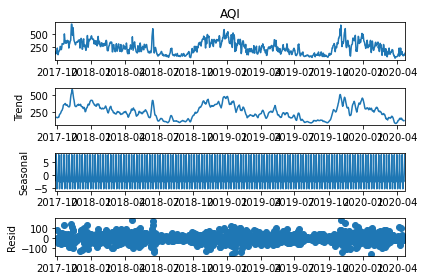

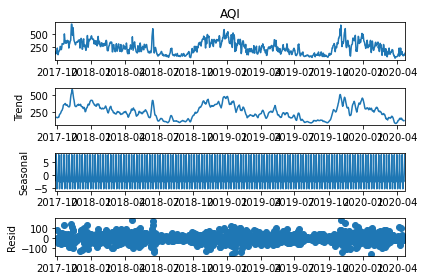

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
data.index = data.Date
data.drop(columns = ['Date'],inplace = True)
data.sort_index(inplace = True)
result = seasonal_decompose(data['AQI'],model = 'additive')
result.plot()

# **HyperParameter Tuning for SARIMA**

In [ ]:
from pmdarima import auto_arima
# Fit auto_arima function to AirPassengers dataset
stepwise_fit = auto_arima(data['AQI'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise
  
# To print the summary
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=3.51 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=11333.121, Time=0.08 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=10273.391, Time=2.14 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=10538.937, Time=2.98 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=11331.141, Time=0.05 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=10509.632, Time=0.26 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=10207.486, Time=6.22 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=8.99 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=2.69 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=11196.474, Time=5.59 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=10184.535, Time=7.04 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=10243.752, Time=3.03 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=12.17 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=3.67 sec
 ARIMA(3,0,0)(2,1,0)[12] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  942
Model:             SARIMAX(3, 0, 1)x(2, 1, [], 12)   Log Likelihood               -5077.345
Date:                             Mon, 22 Nov 2021   AIC                          10168.690
Time:                                     14:04:22   BIC                          10202.536
Sample:                                          0   HQIC                         10181.599
                                             - 942                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7469      0.089     19.607      0.000       1.572       1.922
ar.L2         -0.9870      0.084    -11.726      0.000      -1.152      -0.822
ar.L3          0.2125      0.028      7.577      0.000       0.158       0.267
ma.L1         -0.7917      0.087     -9.065      0.000      -0.963      -0.621
ar.S.L12      -0.6249      0.031    -20.121      0.000      -0.686      -0.564
ar.S.L24      -0.2741      0.031     -8.878      0.000      -0.335      -0.214
sigma2      3212.7159    115.372     27.847      0.000    2986.590    3438.841
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               108.58
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.94   Skew:                            -0.04
Prob(H) (two-sided):                  0.56   Kurtosis:                         4.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
data.shape[0]

942

# **Implementing SARIMA**

In [ ]:
train = data.iloc[:len(data)-365]
test = data.iloc[len(data)-365:]

from statsmodels.tsa.statespace.sarimax import SARIMAX
  
model = SARIMAX(train['AQI'], 
                order = (3,0,1), 
                seasonal_order =(2, 1, [], 12))
  
result = model.fit()
result.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                 AQI   No. Observations:                  577
Model:             SARIMAX(3, 0, 1)x(2, 1, [], 12)   Log Likelihood               -3090.988
Date:                             Mon, 22 Nov 2021   AIC                           6195.977
Time:                                     14:04:27   BIC                           6226.335
Sample:                                 09-26-2017   HQIC                          6207.826
                                      - 04-25-2019                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7482      0.106     16.518      0.000       1.541       1.956
ar.L2         -1.0160      0.104     -9.792      0.000      -1.219      -0.813
ar.L3          0.2394      0.038      6.249      0.000       0.164       0.314
ma.L1         -0.7803      0.105     -7.462      0.000      -0.985      -0.575
ar.S.L12      -0.6609      0.040    -16.703      0.000      -0.738      -0.583
ar.S.L24      -0.2758      0.042     -6.577      0.000      -0.358      -0.194
sigma2      3269.8706    151.834     21.536      0.000    2972.282    3567.460
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                47.30
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               1.09   Skew:                            -0.07
Prob(H) (two-sided):                  0.58   Kurtosis:                         4.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# **Measuring the Fit and making Predictions**

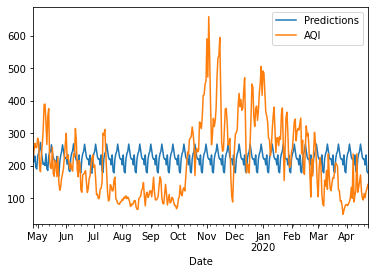

In [ ]:
start = len(train)
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")
  
# plot predictions and actual values
predictions.plot(legend = True)
test['AQI'].plot(legend = True)

In [ ]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
  
# Calculate root mean squared error
print(rmse(test["AQI"], predictions))
  
# Calculate mean squared error
print(mean_squared_error(test["AQI"], predictions))

117.29491097707248
13758.096141119357


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


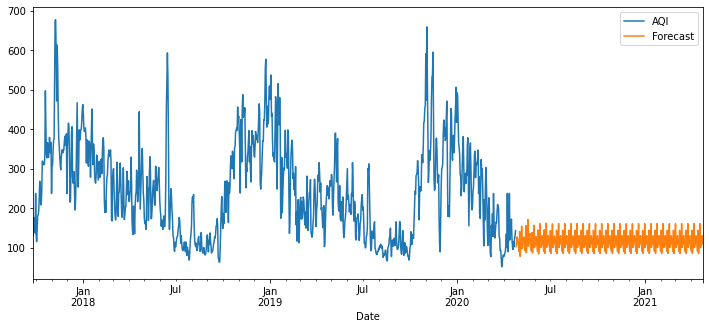

In [ ]:
model = SARIMAX(data['AQI'], 
                        order = (3,0, 1), 
                        seasonal_order =(2, 1, [], 12))
result = model.fit()
  
# Forecast for the next 3 years
forecast = result.predict(start = len(data), 
                          end = (len(data)-1) +  365, 
                          typ = 'levels').rename('Forecast')
  
# Plot the forecast values
data['AQI'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)

In [ ]:
from sklearn.metrics import r2_score
r2_score(test['AQI'], predictions)

-0.03232890527512633

In [ ]:
train = delhi_wd[:round(len(delhi_wd)*0.7)]
test = delhi_wd[round(len(delhi_wd)*0.7):]

In [ ]:
train.head()

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,T,P0,P,U,DD,Ff,WW,VV,Td
0,2017-09-26,66.12,114.15,23.12,27.52,18.35,34.54,0.6,7.13,30.45,0.25,1.38,0.13,131.0,28.0,735.4,755.4,74.0,0,0.0,21,3.2,23.0
1,2017-09-26,66.12,114.15,23.12,27.52,18.35,34.54,0.6,7.13,30.45,0.25,1.38,0.13,131.0,29.0,735.4,755.4,70.0,0,0.0,21,3.2,23.0
2,2017-09-26,66.12,114.15,23.12,27.52,18.35,34.54,0.6,7.13,30.45,0.25,1.38,0.13,131.0,29.0,735.4,755.4,70.0,0,0.0,21,3.2,23.0
3,2017-09-26,66.12,114.15,23.12,27.52,18.35,34.54,0.6,7.13,30.45,0.25,1.38,0.13,131.0,29.0,735.4,755.4,70.0,0,0.0,21,3.2,23.0
4,2017-09-26,66.12,114.15,23.12,27.52,18.35,34.54,0.6,7.13,30.45,0.25,1.38,0.13,131.0,31.0,735.6,755.4,62.0,0,0.0,21,3.2,23.0


In [ ]:
from pycaret.regression import *
reg = setup(data = train, 
             target = 'AQI',
             numeric_imputation = 'median',
             normalize = True,
             silent = True)

,Description,Value
0,session_id,6014
1,Target,AQI
2,Original Data,"(32516, 23)"
3,Missing Values,False
4,Numeric Features,20
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(22761, 58)"


In [ ]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
dt,Decision Tree Regressor,0.0065,0.2101,0.2773,1.0000,0.0009,0.0000,0.182
rf,Random Forest Regressor,0.0135,0.0246,0.1467,1.0000,0.0005,0.0001,10.466
et,Extra Trees Regressor,0.0073,0.0092,0.0804,1.0000,0.0003,0.0000,6.642
lightgbm,Light Gradient Boosting Machine,2.6833,11.2278,3.3498,0.9991,0.0182,0.0134,0.500
knn,K Neighbors Regressor,1.4182,33.9480,5.7724,0.9974,0.0301,0.0077,1.137
gbr,Gradient Boosting Regressor,12.2004,245.1557,15.6544,0.9813,0.0723,0.0561,4.928
ada,AdaBoost Regressor,23.0447,762.2719,27.6068,0.9418,0.1459,0.1215,2.754
br,Bayesian Ridge,19.7303,781.6548,27.9553,0.9403,0.1148,0.0863,0.098
ridge,Ridge Regression,19.7311,781.6517,27.9553,0.9403,0.1148,0.0863,0.033
lr,Linear Regression,19.9501,794.2225,28.1663,0.9394,0.1161,0.0873,0.334


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=6014, splitter='best')

In [ ]:
etr = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0130,0.0545,0.2335,1.0,0.0006,0.0
1,0.0067,0.0040,0.0632,1.0,0.0003,0.0
2,0.0068,0.0038,0.0618,1.0,0.0002,0.0
3,0.0041,0.0018,0.0425,1.0,0.0002,0.0
4,0.0065,0.0040,0.0629,1.0,0.0003,0.0
5,0.0044,0.0018,0.0429,1.0,0.0003,0.0
6,0.0085,0.0049,0.0701,1.0,0.0003,0.0
7,0.0099,0.0067,0.0816,1.0,0.0003,0.0
8,0.0077,0.0060,0.0774,1.0,0.0003,0.0
9,0.0058,0.0046,0.0678,1.0,0.0003,0.0


In [ ]:
tuned_etr = tune_model(etr)

IntProgress(value=0, description='Processing: ', max=7)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,14:14:57
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Extra Trees Regressor


,MAE,MSE,RMSE,R2,RMSLE,MAPE


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


KeyboardInterrupt: ignored

In [ ]:
interpret_model(etr)

ImportError: ignored

In [ ]:
test.drop(columns=['AQI'],inplace = True)

In [ ]:
predictions = predict_model(etr, data = test)
predictions['AQI']

32618    107.0
32619    107.0
32620    107.0
32621    107.0
32622    107.0
         ...  
46697    101.0
46698    101.0
46699    101.0
46700    101.0
46701    101.0
Name: AQI, Length: 13936, dtype: float64

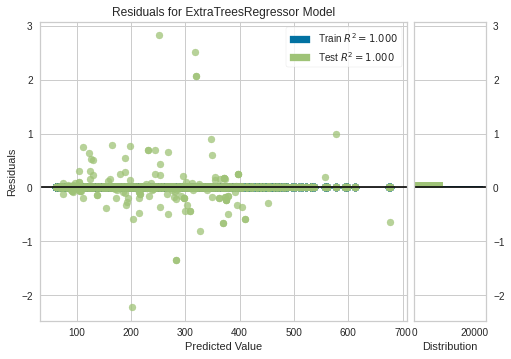

In [ ]:
plot_model(etr)

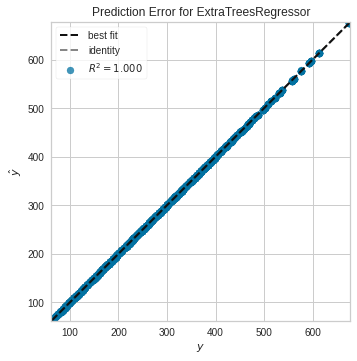

In [ ]:
plot_model(etr , plot = 'error')

In [ ]:
evaluate_model(etr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…